In [4]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
import random

from sklearn.metrics import mean_absolute_percentage_error

In [5]:
df = pd.read_excel(f"Groceries_Sales_data.xlsx",index_col=0)


In [6]:
df.head()

,Sales
Date,
2018-02-01,21199.0
2018-02-02,10634.0
2018-02-03,7966.0
2018-02-04,1353.0
2018-02-05,9497.0


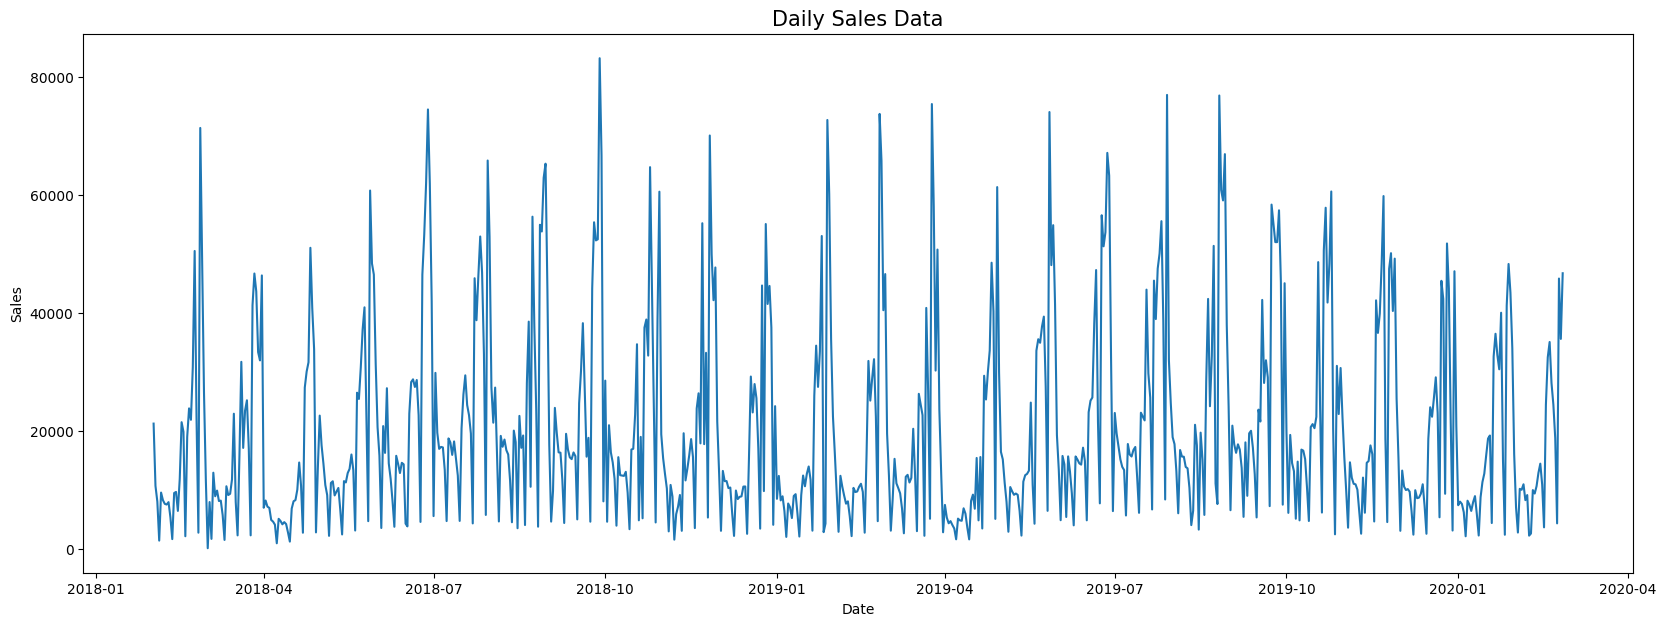

In [7]:
fig, ax = plt.subplots(figsize=(20,7))
a = sns.lineplot(x="Date", y="Sales", data=df)
a.set_title("Daily Sales Data",fontsize=15)
plt.show()


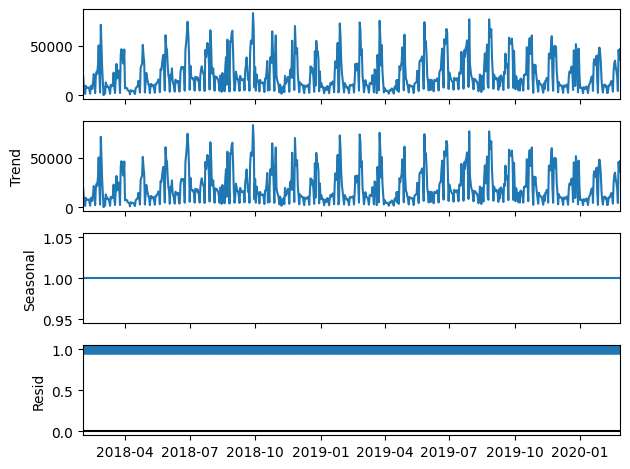

In [8]:
result_2 = seasonal_decompose(df, model='multiplicative', period=1)
result_2.plot()
plt.show()

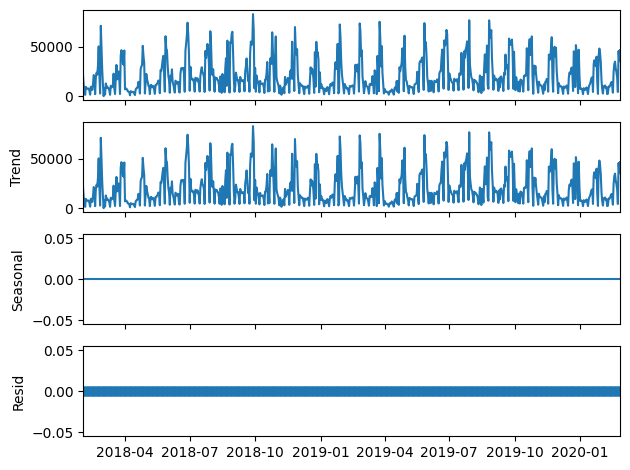

In [9]:
result_3 = seasonal_decompose(df, model='additive', period=1)
result_3.plot()
plt.show()

In [10]:
df.index = pd.to_datetime(df.index)

In [11]:
df

,Sales
Date,
2018-02-01,21199.0
2018-02-02,10634.0
2018-02-03,7966.0
2018-02-04,1353.0
2018-02-05,9497.0
...,...
2020-02-22,18723.1
2020-02-23,4274.9
2020-02-24,45805.7


In [12]:
y = df["Sales"]
y.name = "Sales"

In [13]:
seasonal_df = y.to_frame()
seasonal_df

,Sales
Date,
2018-02-01,21199.0
2018-02-02,10634.0
2018-02-03,7966.0
2018-02-04,1353.0
2018-02-05,9497.0
...,...
2020-02-22,18723.1
2020-02-23,4274.9
2020-02-24,45805.7


In [14]:
seasonal_df["trend"] = seasonal_df["Sales"].rolling(window=7, center=True).mean()
seasonal_df.head(10)

,Sales,trend
Date,,
2018-02-01,21199.0,NaN
2018-02-02,10634.0,NaN
2018-02-03,7966.0,NaN
2018-02-04,1353.0,9491.000000
2018-02-05,9497.0,7529.857143
2018-02-06,8207.0,7136.142857
2018-02-07,7581.0,6757.285714
2018-02-08,7471.0,6793.285714
2018-02-09,7878.0,6782.142857


In [15]:
seasonal_df["detrended"] = seasonal_df["Sales"] - seasonal_df["trend"]
seasonal_df.head(10)

,Sales,trend,detrended
Date,,,
2018-02-01,21199.0,NaN,NaN
2018-02-02,10634.0,NaN,NaN
2018-02-03,7966.0,NaN,NaN
2018-02-04,1353.0,9491.000000,-8138.000000
2018-02-05,9497.0,7529.857143,1967.142857
2018-02-06,8207.0,7136.142857,1070.857143
2018-02-07,7581.0,6757.285714,823.714286
2018-02-08,7471.0,6793.285714,677.714286
2018-02-09,7878.0,6782.142857,1095.857143


In [16]:
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")
seasonal_df.head(15)


,Sales,trend,detrended,month,seasonality
Date,,,,,
2018-02-01,21199.0,NaN,NaN,2,-112.66203
2018-02-02,10634.0,NaN,NaN,2,-112.66203
2018-02-03,7966.0,NaN,NaN,2,-112.66203
2018-02-04,1353.0,9491.000000,-8138.000000,2,-112.66203
2018-02-05,9497.0,7529.857143,1967.142857,2,-112.66203
2018-02-06,8207.0,7136.142857,1070.857143,2,-112.66203
2018-02-07,7581.0,6757.285714,823.714286,2,-112.66203
2018-02-08,7471.0,6793.285714,677.714286,2,-112.66203
2018-02-09,7878.0,6782.142857,1095.857143,2,-112.66203


In [17]:
seasonal_df = y.to_frame()

# calculate the trend component
seasonal_df["trend"] = seasonal_df["Sales"].rolling(window=13, center=True).mean()

# detrend the series
seasonal_df["detrended"] = seasonal_df["Sales"] - seasonal_df["trend"]

# calculate the seasonal component
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")

# get the residuals
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]

# display the DF
seasonal_df.head(15)

,Sales,trend,detrended,month,seasonality,resid
Date,,,,,,
2018-02-01,21199.0,NaN,NaN,2,381.152198,NaN
2018-02-02,10634.0,NaN,NaN,2,381.152198,NaN
2018-02-03,7966.0,NaN,NaN,2,381.152198,NaN
2018-02-04,1353.0,NaN,NaN,2,381.152198,NaN
2018-02-05,9497.0,NaN,NaN,2,381.152198,NaN
2018-02-06,8207.0,NaN,NaN,2,381.152198,NaN
2018-02-07,7581.0,8287.230769,-706.230769,2,381.152198,-1087.382967
2018-02-08,7471.0,7147.930769,323.069231,2,381.152198,-58.082967
2018-02-09,7878.0,7237.546154,640.453846,2,381.152198,259.301648


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

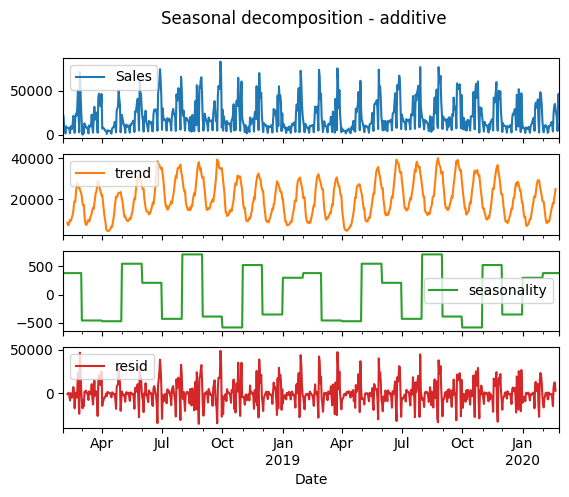

In [18]:
seasonal_df.loc[:, ["Sales", "trend", "seasonality", "resid"]].plot(subplots=True, title="Seasonal decomposition - additive")


In [19]:
df=df.reset_index(['Date'])

In [20]:
df

,Date,Sales
0,2018-02-01,21199.0
1,2018-02-02,10634.0
2,2018-02-03,7966.0
3,2018-02-04,1353.0
4,2018-02-05,9497.0
...,...,...
751,2020-02-22,18723.1
752,2020-02-23,4274.9
753,2020-02-24,45805.7
754,2020-02-25,35566.3


In [23]:
# Extract features
df_copy = df.copy()

df_copy['date'] = df['Date']
df_copy['month'] = df_copy['date'].dt.strftime('%B')
df_copy['year'] = df_copy['date'].dt.strftime('%Y')
df_copy['dayofweek'] = df_copy['date'].dt.strftime('%A')
df_copy['quarter'] = df_copy['date'].dt.quarter
df_copy['dayofyear'] = df_copy['date'].dt.dayofyear
df_copy['dayofmonth'] = df_copy['date'].dt.day
df_copy['weekofyear'] = df_copy['date'].dt.isocalendar().week

In [24]:
df_copy.columns

Index(['Date', 'Sales', 'date', 'month', 'year', 'dayofweek', 'quarter',
       'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [25]:
X = df_copy[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
y = df['Sales']


In [26]:
df_new = pd.concat([X, y], axis=1)
df_new.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Sales
0,Thursday,1,February,2018,32,1,5,21199.0
1,Friday,1,February,2018,33,2,5,10634.0
2,Saturday,1,February,2018,34,3,5,7966.0
3,Sunday,1,February,2018,35,4,5,1353.0
4,Monday,1,February,2018,36,5,6,9497.0


AttributeError: 'NoneType' object has no attribute 'remove'

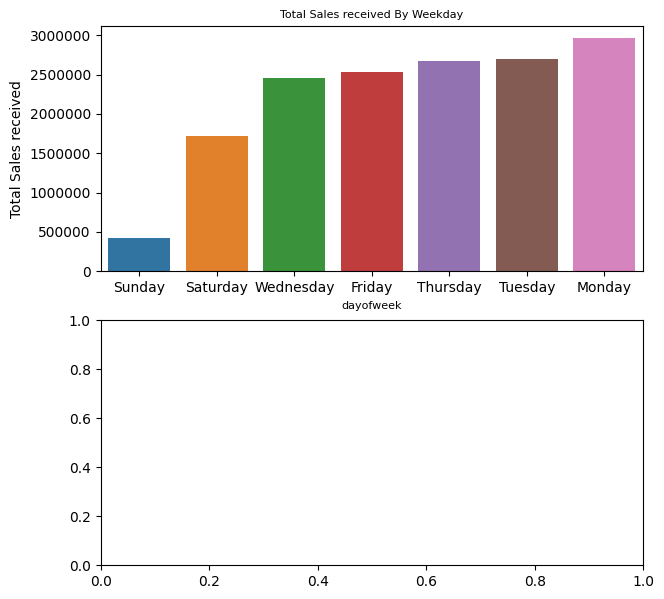

In [27]:
# fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(7,7)

week_day_Aggregated = pd.DataFrame(df_new.groupby("dayofweek")["Sales"].sum()).reset_index().sort_values('Sales')
sns.barplot(data=week_day_Aggregated,x="dayofweek",y="Sales",hue = 'dayofweek',ax=ax1,dodge=False)
ax1.set(xlabel='dayofweek', ylabel='Total Sales received')
ax1.xaxis.label.set_size(8)
ax1.set_title("Total Sales received By Weekday",fontsize=8)
ax1.ticklabel_format(style='plain',axis='y')
ax1.legend_.remove()


yearAggregated = pd.DataFrame(df_new.groupby("year")["Sales"].sum()).reset_index()
sns.barplot(data=yearAggregated,x="year",y="Sales",hue='year',ax=ax2)
ax2.set(xlabel='year', ylabel='Total Sales received')
ax2.xaxis.label.set_size(8)
ax2.set_title("Total Sales received By year",fontsize=8)
ax2.ticklabel_format(style='plain',axis='y')

fig.tight_layout()

In [28]:
# Train test split

In [29]:
df=df.rename(columns={'Date':'ds','Sales':'y'})
df.tail()


,ds,y
751,2020-02-22,18723.1
752,2020-02-23,4274.9
753,2020-02-24,45805.7
754,2020-02-25,35566.3
755,2020-02-26,46703.0


In [30]:
end_date = '2019-12-31'
X_tr = df.loc[df['ds'] <= end_date]
X_tst = df.loc[df['ds'] > end_date]

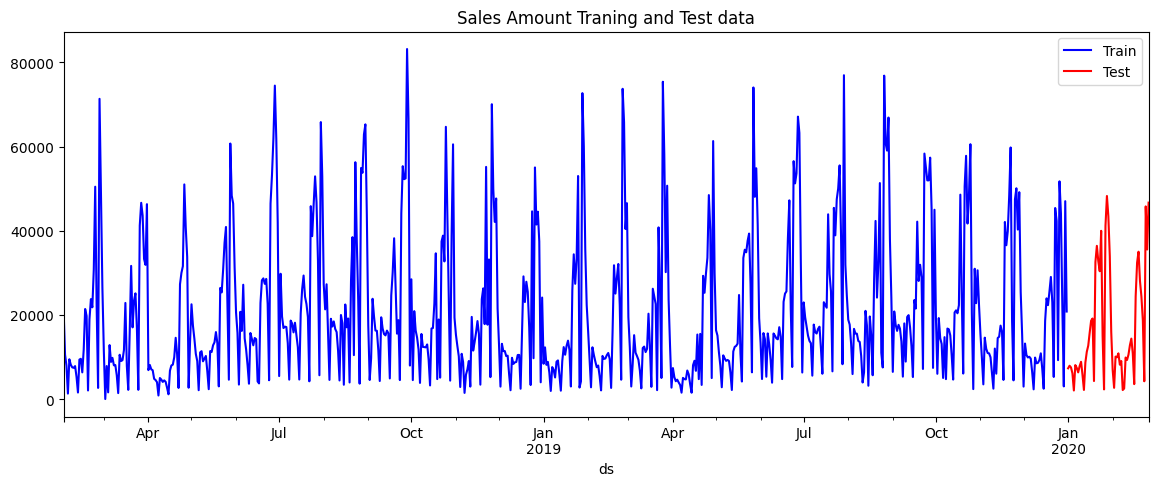

In [31]:
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(14,5))
X_tr.plot(kind='line', x='ds', y='y', color='blue', label='Train', ax=ax)
X_tst.plot(kind='line', x='ds', y='y', color='red', label='Test', ax=ax)
plt.title('Sales Amount Traning and Test data')
plt.show()

In [ ]:
# Modelling

In [32]:
model =Prophet()
model.fit(X_tr)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/qrokk3g9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/lvvd6e3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69383', 'data', 'file=/tmp/tmp0z1ib4sr/qrokk3g9.json', 'init=/tmp/tmp0z1ib4sr/lvvd6e3j.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelz5tpnc4q/prophet_model-20250915110115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:01:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
len(X_tst)

57

In [34]:
X_tst

,ds,y
699,2020-01-01,7353.6
700,2020-01-02,7959.7
701,2020-01-03,7559.3
702,2020-01-04,6162.3
703,2020-01-05,2085.9
704,2020-01-06,8120.0
705,2020-01-07,7464.4
706,2020-01-08,6385.6
707,2020-01-09,7873.0
708,2020-01-10,8899.9


In [35]:
future = model.make_future_dataframe(periods=57, freq='D')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-02-01,22918.473941,4309.902531,41382.122311
1,2018-02-02,21609.554668,2484.440740,39732.517145
2,2018-02-03,14076.387315,-5366.567568,31683.608667
3,2018-02-04,1669.011765,-17168.907855,20456.339101
4,2018-02-05,25535.083176,6342.620793,44469.766034


In [36]:
future_2 = model.make_future_dataframe(periods=60)
forecast_2 = model.predict(future_2)
forecast_2[['ds', 'yhat']].tail(5)

,ds,yhat
754,2020-02-25,27945.349608
755,2020-02-26,25546.363061
756,2020-02-27,28114.586689
757,2020-02-28,26805.667405
758,2020-02-29,19272.500042


In [37]:
X_tst_forecast = model.predict(X_tst)
X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
50,2020-02-20,28066.474534,8629.602838,47123.794519
51,2020-02-21,26757.555250,7722.491668,45729.362031
52,2020-02-22,19224.387887,-292.238138,38104.672555
53,2020-02-23,6817.012325,-12434.189570,27572.742364
54,2020-02-24,30683.083725,11796.467416,49312.197799
55,2020-02-25,27945.349608,8769.784260,48096.094269
56,2020-02-26,25546.363061,8405.718771,44849.754932


In [38]:
X_tst_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,23212.897455,6102.533931,44322.953076,23212.897455,23212.897455,1948.568368,1948.568368,1948.568368,1948.568368,1948.568368,1948.568368,0.0,0.0,0.0,25161.465823
1,2020-01-02,23219.770620,7036.115730,47539.945742,23219.770620,23219.770620,4509.918830,4509.918830,4509.918830,4509.918830,4509.918830,4509.918830,0.0,0.0,0.0,27729.689451
2,2020-01-03,23226.643785,6584.008607,46084.543046,23226.643785,23226.643785,3194.126381,3194.126381,3194.126381,3194.126381,3194.126381,3194.126381,0.0,0.0,0.0,26420.770167
3,2020-01-04,23233.516950,-1098.809896,38431.289825,23233.516950,23233.516950,-4345.914147,-4345.914147,-4345.914147,-4345.914147,-4345.914147,-4345.914147,0.0,0.0,0.0,18887.602803
4,2020-01-05,23240.390115,-12187.457020,26151.027146,23240.390115,23240.390115,-16760.162873,-16760.162873,-16760.162873,-16760.162873,-16760.162873,-16760.162873,0.0,0.0,0.0,6480.227242
5,2020-01-06,23247.263280,10076.575279,50069.484143,23247.263280,23247.263280,7099.035362,7099.035362,7099.035362,7099.035362,7099.035362,7099.035362,0.0,0.0,0.0,30346.298642
6,2020-01-07,23254.136445,9588.131422,46839.763855,23254.136444,23254.136446,4354.428080,4354.428080,4354.428080,4354.428080,4354.428080,4354.428080,0.0,0.0,0.0,27608.564525
7,2020-01-08,23261.009610,6584.920713,45081.213929,23261.009608,23261.009612,1948.568368,1948.568368,1948.568368,1948.568368,1948.568368,1948.568368,0.0,0.0,0.0,25209.577978
8,2020-01-09,23267.882775,9112.225697,46488.264092,23267.882772,23267.882779,4509.918830,4509.918830,4509.918830,4509.918830,4509.918830,4509.918830,0.0,0.0,0.0,27777.801606
9,2020-01-10,23274.755940,7273.982742,44451.122451,23274.755936,23274.755945,3194.126381,3194.126381,3194.126381,3194.126381,3194.126381,3194.126381,0.0,0.0,0.0,26468.882322


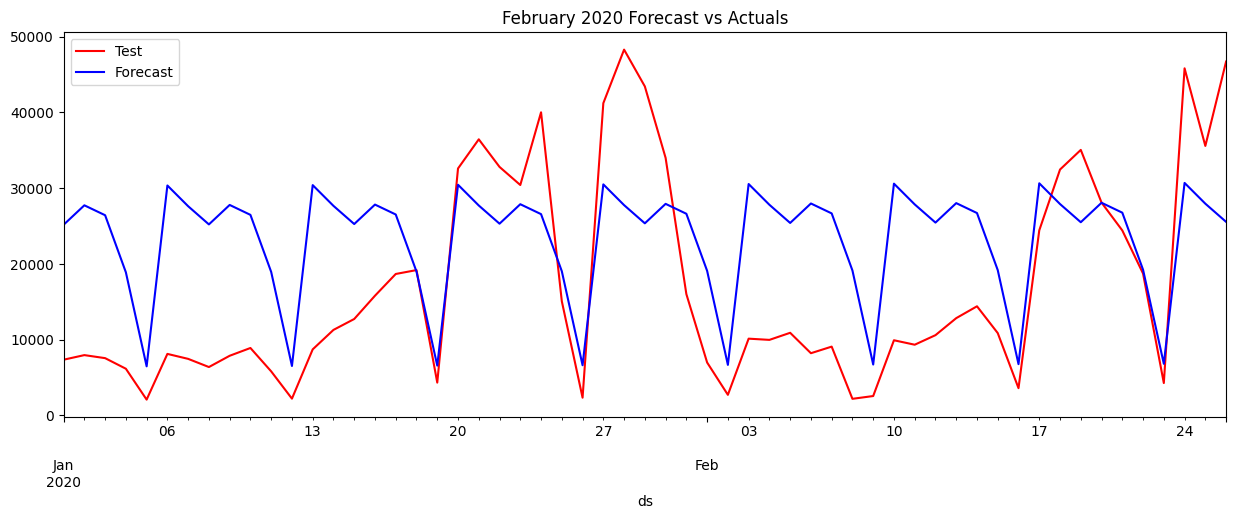

In [40]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
X_tst_forecast.plot(kind='line',x='ds',y='yhat', color='blue',label='Forecast', ax=ax)
plt.title('February 2020 Forecast vs Actuals')
plt.show()

In [39]:
mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast['yhat'])
print("MAPE",mape)

MAPE 1.2952508075863325


In [41]:
# Add Holidays import holidays which is a different libraries
# Handdling holidays

In [42]:
import holidays

In [44]:
india_holidays = holidays.India(years = 2018)

holiday_india_df = pd.DataFrame([])

for date, name in sorted(india_holidays.items()):
    print(date, name)
    holiday_india_df = pd.concat([holiday_india_df, pd.DataFrame({'ds': date, 'holiday': name}, index=[0])], ignore_index=True)

2018-01-26 Republic Day
2018-02-13 Maha Shivaratri
2018-03-29 Mahavir Jayanti
2018-03-30 Good Friday
2018-04-30 Buddha Purnima
2018-06-16 Eid al-Fitr
2018-08-15 Independence Day
2018-08-22 Eid al-Adha
2018-09-03 Janmashtami
2018-09-21 Ashura
2018-10-02 Gandhi Jayanti
2018-10-19 Dussehra
2018-11-07 Diwali
2018-11-21 Prophet's Birthday
2018-11-23 Guru Nanak Jayanti
2018-12-25 Christmas


In [45]:
holiday_india_df

,ds,holiday
0,2018-01-26,Republic Day
1,2018-02-13,Maha Shivaratri
2,2018-03-29,Mahavir Jayanti
3,2018-03-30,Good Friday
4,2018-04-30,Buddha Purnima
5,2018-06-16,Eid al-Fitr
6,2018-08-15,Independence Day
7,2018-08-22,Eid al-Adha
8,2018-09-03,Janmashtami
9,2018-09-21,Ashura


In [47]:
india_holidays_mh = holidays.India(years = 2018,subdiv='MH')

holiday_india_mh = pd.DataFrame([])

for date, name in sorted(india_holidays_mh.items()):
    print(date, name)
    holiday_india_mh = pd.concat([holiday_india_mh, pd.DataFrame({'ds': date, 'holiday': name}, index=[0])], ignore_index=True)

2018-01-26 Republic Day
2018-02-13 Maha Shivaratri
2018-02-19 Chhatrapati Shivaji Maharaj Jayanti
2018-03-18 Gudi Padwa
2018-03-29 Mahavir Jayanti
2018-03-30 Good Friday
2018-04-14 Dr. B. R. Ambedkar's Jayanti
2018-04-30 Buddha Purnima
2018-05-01 Maharashtra Day
2018-06-16 Eid al-Fitr
2018-08-15 Independence Day
2018-08-22 Eid al-Adha
2018-09-03 Janmashtami
2018-09-21 Ashura
2018-10-02 Gandhi Jayanti
2018-10-19 Dussehra
2018-11-07 Diwali
2018-11-21 Prophet's Birthday
2018-11-23 Guru Nanak Jayanti
2018-12-25 Christmas


In [48]:
holiday_india_mh

,ds,holiday
0,2018-01-26,Republic Day
1,2018-02-13,Maha Shivaratri
2,2018-02-19,Chhatrapati Shivaji Maharaj Jayanti
3,2018-03-18,Gudi Padwa
4,2018-03-29,Mahavir Jayanti
5,2018-03-30,Good Friday
6,2018-04-14,Dr. B. R. Ambedkar's Jayanti
7,2018-04-30,Buddha Purnima
8,2018-05-01,Maharashtra Day
9,2018-06-16,Eid al-Fitr


In [50]:
holiday = pd.DataFrame([])
for date, name in sorted(holidays.UnitedStates(years=[2018,2019,2020]).items()):
    holiday = pd.concat([holiday, pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0])], ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

/tmp/ipython-input-3775490065.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')


In [51]:
holiday.tail(7)

,ds,holiday
25,2020-07-03,US-Holidays
26,2020-07-04,US-Holidays
27,2020-09-07,US-Holidays
28,2020-10-12,US-Holidays
29,2020-11-11,US-Holidays
30,2020-11-26,US-Holidays
31,2020-12-25,US-Holidays


In [53]:
holiday_2 = pd.DataFrame([])

for date, name in sorted(holidays.India(years=[2018,2019,2020]).items()):
    holiday_2 = pd.concat([holiday_2, pd.DataFrame({'ds': date, 'holiday': "India-Holidays"}, index=[0])], ignore_index=True)
holiday_2['ds'] = pd.to_datetime(holiday_2['ds'], format='%Y-%m-%d', errors='ignore')

/tmp/ipython-input-2575076591.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  holiday_2['ds'] = pd.to_datetime(holiday_2['ds'], format='%Y-%m-%d', errors='ignore')


In [54]:
m_2 = Prophet()
m_2.add_country_holidays(country_name='IN')
m_2.fit(df)

/usr/local/lib/python3.12/dist-packages/holidays/countries/india.py:182: Warning: Requested Holidays are available only from 2001 to 2035.
  warnings.warn(warning_msg, Warning)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/t7uz5p4s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ssdwkhcl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9454', 'data', 'file=/tmp/tmp0z1ib4sr/t7uz5p4s.json', 'init=/tmp/tmp0z1ib4sr/ssdwkhcl.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeli5ptw6eg/prophet_model-20250915110712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:07:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:07:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

In [55]:
m_2.train_holiday_names

,0
0,Republic Day
1,Independence Day
2,Gandhi Jayanti
3,Buddha Purnima
4,Diwali
5,Janmashtami
6,Dussehra
7,Mahavir Jayanti
8,Maha Shivaratri
9,Guru Nanak Jayanti


In [ ]:
# fit with holidays

In [56]:
model_with_holidays = Prophet(holidays=holiday)
model_with_holidays.fit(X_tr)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/u236qj7z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/6j0tlids.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31256', 'data', 'file=/tmp/tmp0z1ib4sr/u236qj7z.json', 'init=/tmp/tmp0z1ib4sr/6j0tlids.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeldu0gg6vm/prophet_model-20250915110720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:07:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:07:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [57]:
future_holiday = model_with_holidays.make_future_dataframe(periods=57, freq='D')
forecast_holiday = model_with_holidays.predict(future_holiday)
forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


,ds,yhat,yhat_lower,yhat_upper
749,2020-02-20,28244.407248,8627.550979,47359.315458
750,2020-02-21,26893.953958,8577.026275,46454.202199
751,2020-02-22,19356.400851,748.003899,39839.221352
752,2020-02-23,6955.481209,-11189.434969,26049.579608
753,2020-02-24,30969.646063,11656.259083,50224.605022
754,2020-02-25,28108.442406,9062.089398,47660.871262
755,2020-02-26,25710.999870,7436.656987,45082.128230


In [58]:
X_tst_forecast_holiday = model_with_holidays.predict(X_tst)
X_tst_forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


,ds,yhat,yhat_lower,yhat_upper
50,2020-02-20,28244.407248,9496.894129,47326.632143
51,2020-02-21,26893.953958,6486.930415,44407.484919
52,2020-02-22,19356.400851,665.627959,38331.919280
53,2020-02-23,6955.481209,-11036.942675,25689.891979
54,2020-02-24,30969.646063,12728.829587,48834.770698
55,2020-02-25,28108.442406,9935.542834,47212.249117
56,2020-02-26,25710.999870,6271.306900,44589.431292


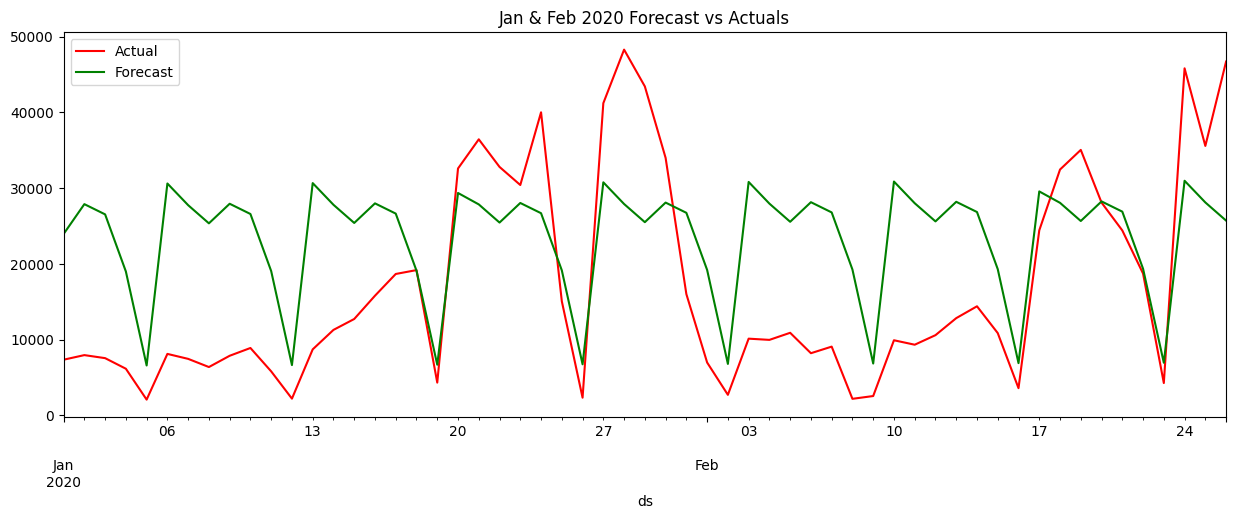

In [59]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_forecast_holiday.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Jan & Feb 2020 Forecast vs Actuals')
plt.show()

In [60]:
mape_holiday = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast_holiday['yhat'])
print("MAPE",round(mape_holiday,4))

MAPE 1.3068


In [ ]:
# n_changepoints is the number of change happen in the data. Prophet model detects them by its own. By default, its value is 25, which are uniformly placed in the first 80% of the time series. Changing n_changepoints can add value to the model.

# changepoint_prior_scale to indicate how flexible the changepoints are allowed to be. In other words, how much can the changepoints fit to the data. If you make it high it will be more flexible, but you can end up overfitting. By default, this parameter is set to 0.05

# seasonality_mode There are 2 types model seasonality mode. Additive & multiplicaticative. By default Prophet fits additive seasonalities, meaning the effect of the seasonality is added to the trend to get the forecast. Prophet can model multiplicative seasonality by setting seasonality_mode='multiplicative' in the model.

# holiday_prior_scale just like changepoint_prior_scale, holiday_prior_scale is used to smoothning the effect of holidays. By default its value is 10, which provides very little regularization. Reducing this parameter dampens holiday effects

# Seasonalities with fourier_order Prophet model, by default finds the seasonalities and adds the default parameters of the seasonality. We can modify the seasonalities effect by adding custom seasonalities as add_seasonality in the model with different fourier order.Yy default Prophet uses a Fourier order of 3 for weekly seasonality and 10 for yearly seasonality.
# seasonality_weekly / seasonality_weekly = True / Fl


In [61]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3],
              'holidays_prior_scale':[0.1,0.2,0.3],
              'n_changepoints' : [100,150]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 36


In [63]:
%%timeit
strt='2019-12-31'
end='2020-02-26'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         holidays=holiday,
                         interval_width=0.95)
    train_model.add_country_holidays(country_name='US')
    train_model.fit(X_tr)
    train_forecast = train_model.make_future_dataframe(periods=57, freq='D',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = df[(df['ds']>strt) & (df['ds']<=end)]
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = pd.concat([model_parameters, pd.DataFrame({'MAPE':MAPE,'Parameters':p},index=[0])],ignore_index=True)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/iaskgr_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/iif431oe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2542', 'data', 'file=/tmp/tmp0z1ib4sr/iaskgr_p.json', 'init=/tmp/tmp0z1ib4sr/iif431oe.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model2u5syohh/prophet_model-20250915110937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<magic-timeit>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the ol

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/iwt47hrn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ny65yarc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11044', 'data', 'file=/tmp/tmp0z1ib4sr/iwt47hrn.json', 'init=/tmp/tmp0z1ib4sr/ny65yarc.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model_d4829rv/prophet_model-20250915110938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/bht989ob.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/jy1k1ll1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67600', 'data', 'file=/tmp/tmp0z1ib4sr/bht989ob.json', 'init=/tmp/tmp0z1ib4sr/jy1k1ll1.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelcpo82bf6/prophet_model-20250915110939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/brrot7z9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/d53u10r1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3219', 'data', 'file=/tmp/tmp0z1ib4sr/brrot7z9.json', 'init=/tmp/tmp0z1ib4sr/d53u10r1.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model0hwu62s0/prophet_model-20250915110939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/6bpykeqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/bhqyftlh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65559', 'data', 'file=/tmp/tmp0z1ib4sr/6bpykeqb.json', 'init=/tmp/tmp0z1ib4sr/bhqyftlh.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelhui088e2/prophet_model-20250915110939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/51h6wnbm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/7aicbv1z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27218', 'data', 'file=/tmp/tmp0z1ib4sr/51h6wnbm.json', 'init=/tmp/tmp0z1ib4sr/7aicbv1z.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model4cpo_evl/prophet_model-20250915110940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/rg_2fuzl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/0ejzsv8r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90466', 'data', 'file=/tmp/tmp0z1ib4sr/rg_2fuzl.json', 'init=/tmp/tmp0z1ib4sr/0ejzsv8r.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeltaj24g86/prophet_model-20250915110940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/iyv7ghf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/7s_qwkjf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10142', 'data', 'file=/tmp/tmp0z1ib4sr/iyv7ghf6.json', 'init=/tmp/tmp0z1ib4sr/7s_qwkjf.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_models_4m6f2u/prophet_model-20250915110941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_h2bwjh2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/qdudn9pk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9482', 'data', 'file=/tmp/tmp0z1ib4sr/_h2bwjh2.json', 'init=/tmp/tmp0z1ib4sr/qdudn9pk.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelcxbvrwxb/prophet_model-20250915110941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/xuurvs42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/nnul9n1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90813', 'data', 'file=/tmp/tmp0z1ib4sr/xuurvs42.json', 'init=/tmp/tmp0z1ib4sr/nnul9n1f.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelfo8_116z/prophet_model-20250915110942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4t3q0kyx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2bmy5mlh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=166', 'data', 'file=/tmp/tmp0z1ib4sr/4t3q0kyx.json', 'init=/tmp/tmp0z1ib4sr/2bmy5mlh.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelp0fw6y6o/prophet_model-20250915110942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/p8e5qjmt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ru41an8z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89989', 'data', 'file=/tmp/tmp0z1ib4sr/p8e5qjmt.json', 'init=/tmp/tmp0z1ib4sr/ru41an8z.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelymsuqmlt/prophet_model-20250915110943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wcqb1j_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/93g0f3dl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17032', 'data', 'file=/tmp/tmp0z1ib4sr/wcqb1j_x.json', 'init=/tmp/tmp0z1ib4sr/93g0f3dl.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modely4tls72q/prophet_model-20250915110943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/r_c_yo6e.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/f6ba1bn0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8023', 'data', 'file=/tmp/tmp0z1ib4sr/r_c_yo6e.json', 'init=/tmp/tmp0z1ib4sr/f6ba1bn0.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model8xemvhb6/prophet_model-20250915110944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/45ra3k8q.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/oup230_m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81208', 'data', 'file=/tmp/tmp0z1ib4sr/45ra3k8q.json', 'init=/tmp/tmp0z1ib4sr/oup230_m.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelj71zvoaf/prophet_model-20250915110944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2_cs15_z.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/nloacvk8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69284', 'data', 'file=/tmp/tmp0z1ib4sr/2_cs15_z.json', 'init=/tmp/tmp0z1ib4sr/nloacvk8.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelwek56ev8/prophet_model-20250915110945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/0o0s45o2.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ep9z2gtn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11088', 'data', 'file=/tmp/tmp0z1ib4sr/0o0s45o2.json', 'init=/tmp/tmp0z1ib4sr/ep9z2gtn.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeldd5bjcc1/prophet_model-20250915110946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/i59g5f45.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2m9mrbhl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43370', 'data', 'file=/tmp/tmp0z1ib4sr/i59g5f45.json', 'init=/tmp/tmp0z1ib4sr/2m9mrbhl.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model64rp1kj1/prophet_model-20250915110946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ngp_vnqs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ytzas3oy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ogwusb6m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/d03gxxqb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87754', 'data', 'file=/tmp/tmp0z1ib4sr/ogwusb6m.json', 'init=/tmp/tmp0z1ib4sr/d03gxxqb.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeluzd0gpuk/prophet_model-20250915110947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wvsofo96.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/pul7o7ex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90711', 'data', 'file=/tmp/tmp0z1ib4sr/wvsofo96.json', 'init=/tmp/tmp0z1ib4sr/pul7o7ex.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelhbzuarum/prophet_model-20250915110948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/atmv59gg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/a7820e7c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88178', 'data', 'file=/tmp/tmp0z1ib4sr/atmv59gg.json', 'init=/tmp/tmp0z1ib4sr/a7820e7c.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelbbe916hu/prophet_model-20250915110948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/k9j_elxc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ib7rl5as.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88595', 'data', 'file=/tmp/tmp0z1ib4sr/k9j_elxc.json', 'init=/tmp/tmp0z1ib4sr/ib7rl5as.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelnw8by_fz/prophet_model-20250915110949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/k6tq9_cx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/5yygya8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3506', 'data', 'file=/tmp/tmp0z1ib4sr/k6tq9_cx.json', 'init=/tmp/tmp0z1ib4sr/5yygya8s.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelko9jnkpd/prophet_model-20250915110949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ifomb_3c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/oaq9mxew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26953', 'data', 'file=/tmp/tmp0z1ib4sr/ifomb_3c.json', 'init=/tmp/tmp0z1ib4sr/oaq9mxew.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelua1jj_4b/prophet_model-20250915110950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/bav5fthj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/17rjyu_i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6875', 'data', 'file=/tmp/tmp0z1ib4sr/bav5fthj.json', 'init=/tmp/tmp0z1ib4sr/17rjyu_i.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelypfu51hh/prophet_model-20250915110950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/tda5ofa_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/jye3d4lt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24262', 'data', 'file=/tmp/tmp0z1ib4sr/tda5ofa_.json', 'init=/tmp/tmp0z1ib4sr/jye3d4lt.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelurk5___v/prophet_model-20250915110951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/sni7xlmf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ok5g_ai7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91408', 'data', 'file=/tmp/tmp0z1ib4sr/sni7xlmf.json', 'init=/tmp/tmp0z1ib4sr/ok5g_ai7.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelq7cwd7f7/prophet_model-20250915110951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ucfwlq9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/glyxq_fz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76911', 'data', 'file=/tmp/tmp0z1ib4sr/ucfwlq9v.json', 'init=/tmp/tmp0z1ib4sr/glyxq_fz.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model08rcix41/prophet_model-20250915110952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/gxrmkrb5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/63uxqwgv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56955', 'data', 'file=/tmp/tmp0z1ib4sr/gxrmkrb5.json', 'init=/tmp/tmp0z1ib4sr/63uxqwgv.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model6ks3upkw/prophet_model-20250915110952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/9tdj9elb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/nlzl43yq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23760', 'data', 'file=/tmp/tmp0z1ib4sr/9tdj9elb.json', 'init=/tmp/tmp0z1ib4sr/nlzl43yq.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modellljinasq/prophet_model-20250915110952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ytmf0n6i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4vsdbd5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5172', 'data', 'file=/tmp/tmp0z1ib4sr/ytmf0n6i.json', 'init=/tmp/tmp0z1ib4sr/4vsdbd5g.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelanxrs1xh/prophet_model-20250915110953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4y7_zy6p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ur6pk_ff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78546', 'data', 'file=/tmp/tmp0z1ib4sr/4y7_zy6p.json', 'init=/tmp/tmp0z1ib4sr/ur6pk_ff.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeltglwzvy7/prophet_model-20250915110953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/v7s7mmkg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/6sobok26.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26241', 'data', 'file=/tmp/tmp0z1ib4sr/v7s7mmkg.json', 'init=/tmp/tmp0z1ib4sr/6sobok26.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelplc2v3zw/prophet_model-20250915110954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/boo5w3l4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/045dak8j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46800', 'data', 'file=/tmp/tmp0z1ib4sr/boo5w3l4.json', 'init=/tmp/tmp0z1ib4sr/045dak8j.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelvoroohc6/prophet_model-20250915110954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/vkww4f6q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/gu856syw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37383', 'data', 'file=/tmp/tmp0z1ib4sr/vkww4f6q.json', 'init=/tmp/tmp0z1ib4sr/gu856syw.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelzmqmwafd/prophet_model-20250915110955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.038305615887082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<magic-timeit>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/bxc40u10.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/opstgwo3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84366', 'data', 'file=/tmp/tmp0z1ib4sr/bxc40u10.json', 'init=/tmp/tmp0z1ib4sr/opstgwo3.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelhfpwuh8u/prophet_model-20250915110955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:55 - cmdstanpy - INFO 

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/m0agb2_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/z6ufqmy2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38669', 'data', 'file=/tmp/tmp0z1ib4sr/m0agb2_7.json', 'init=/tmp/tmp0z1ib4sr/z6ufqmy2.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelek1c0_rn/prophet_model-20250915110955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:09:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/lduzglsy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/b99ccmlk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87466', 'data', 'file=/tmp/tmp0z1ib4sr/lduzglsy.json', 'init=/tmp/tmp0z1ib4sr/b99ccmlk.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelyeg0eldt/prophet_model-20250915110956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:09:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ozbyd96f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/abhvqavm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4642', 'data', 'file=/tmp/tmp0z1ib4sr/ozbyd96f.json', 'init=/tmp/tmp0z1ib4sr/abhvqavm.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeluf8eolgn/prophet_model-20250915110956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:09:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/uxk7f86f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ohoamdkm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70251', 'data', 'file=/tmp/tmp0z1ib4sr/uxk7f86f.json', 'init=/tmp/tmp0z1ib4sr/ohoamdkm.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model3v8_yzys/prophet_model-20250915110957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:09:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wvaowtbl.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/j2ouk4z0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25493', 'data', 'file=/tmp/tmp0z1ib4sr/wvaowtbl.json', 'init=/tmp/tmp0z1ib4sr/j2ouk4z0.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelulo5lqf4/prophet_model-20250915110958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4a1novu5.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/dpcbqqrg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43691', 'data', 'file=/tmp/tmp0z1ib4sr/4a1novu5.json', 'init=/tmp/tmp0z1ib4sr/dpcbqqrg.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model1s9fszbv/prophet_model-20250915110958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/0i613_9l.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/8l1plpk2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15193', 'data', 'file=/tmp/tmp0z1ib4sr/0i613_9l.json', 'init=/tmp/tmp0z1ib4sr/8l1plpk2.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelb_ogn5e_/prophet_model-20250915110959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/31ta___f.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/riwym60u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41001', 'data', 'file=/tmp/tmp0z1ib4sr/31ta___f.json', 'init=/tmp/tmp0z1ib4sr/riwym60u.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model3sy85ywk/prophet_model-20250915111000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/vh82xeeg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ft34gqym.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/3f0foz1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/8vnqio4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86997', 'data', 'file=/tmp/tmp0z1ib4sr/3f0foz1o.json', 'init=/tmp/tmp0z1ib4sr/8vnqio4x.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeljjf5aoqd/prophet_model-20250915111001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/imkl3joy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/11hty72u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44464', 'data', 'file=/tmp/tmp0z1ib4sr/imkl3joy.json', 'init=/tmp/tmp0z1ib4sr/11hty72u.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeln2l9ttuk/prophet_model-20250915111001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/y7tpon9m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/oo9m6zu_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26099', 'data', 'file=/tmp/tmp0z1ib4sr/y7tpon9m.json', 'init=/tmp/tmp0z1ib4sr/oo9m6zu_.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_models0d6s9m7/prophet_model-20250915111002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/xqm6cn03.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ix2px5wg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19020', 'data', 'file=/tmp/tmp0z1ib4sr/xqm6cn03.json', 'init=/tmp/tmp0z1ib4sr/ix2px5wg.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model78_xlqya/prophet_model-20250915111002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/jhl53vfo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/r4_xplmw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65522', 'data', 'file=/tmp/tmp0z1ib4sr/jhl53vfo.json', 'init=/tmp/tmp0z1ib4sr/r4_xplmw.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelajpzhtof/prophet_model-20250915111003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/26sv1xyg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/44pa0oa5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66701', 'data', 'file=/tmp/tmp0z1ib4sr/26sv1xyg.json', 'init=/tmp/tmp0z1ib4sr/44pa0oa5.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelpmx8j6kw/prophet_model-20250915111003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/3c3igint.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4kpskyj1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10841', 'data', 'file=/tmp/tmp0z1ib4sr/3c3igint.json', 'init=/tmp/tmp0z1ib4sr/4kpskyj1.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelosru79qv/prophet_model-20250915111003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/8pvj65bs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/dpvk4o7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43577', 'data', 'file=/tmp/tmp0z1ib4sr/8pvj65bs.json', 'init=/tmp/tmp0z1ib4sr/dpvk4o7a.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelmp1fdpjv/prophet_model-20250915111004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/bnap6nui.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/p3nlzag2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42567', 'data', 'file=/tmp/tmp0z1ib4sr/bnap6nui.json', 'init=/tmp/tmp0z1ib4sr/p3nlzag2.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelm5jqk6gx/prophet_model-20250915111004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/v9t1g9od.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/f2oo4_kr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2207', 'data', 'file=/tmp/tmp0z1ib4sr/v9t1g9od.json', 'init=/tmp/tmp0z1ib4sr/f2oo4_kr.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model6wvdqgg4/prophet_model-20250915111005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/q469u8ii.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/nt2amol9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64544', 'data', 'file=/tmp/tmp0z1ib4sr/q469u8ii.json', 'init=/tmp/tmp0z1ib4sr/nt2amol9.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model9_nuzk9w/prophet_model-20250915111005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/1e0h3hhe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/8euzml83.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70913', 'data', 'file=/tmp/tmp0z1ib4sr/1e0h3hhe.json', 'init=/tmp/tmp0z1ib4sr/8euzml83.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelff92u5e0/prophet_model-20250915111005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/g5mlaaqy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/f3x7bvyn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30892', 'data', 'file=/tmp/tmp0z1ib4sr/g5mlaaqy.json', 'init=/tmp/tmp0z1ib4sr/f3x7bvyn.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelyvpt4uys/prophet_model-20250915111006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/dgornah2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/l3na0fm6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89427', 'data', 'file=/tmp/tmp0z1ib4sr/dgornah2.json', 'init=/tmp/tmp0z1ib4sr/l3na0fm6.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model23za06g0/prophet_model-20250915111006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2p7r0gsy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/s4julczt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72757', 'data', 'file=/tmp/tmp0z1ib4sr/2p7r0gsy.json', 'init=/tmp/tmp0z1ib4sr/s4julczt.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelwzvu9n3g/prophet_model-20250915111007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_bdy40yc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ajeg25z7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63936', 'data', 'file=/tmp/tmp0z1ib4sr/_bdy40yc.json', 'init=/tmp/tmp0z1ib4sr/ajeg25z7.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model4pw8cbrv/prophet_model-20250915111007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/hs5_c5jq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/w3nhx5dg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57855', 'data', 'file=/tmp/tmp0z1ib4sr/hs5_c5jq.json', 'init=/tmp/tmp0z1ib4sr/w3nhx5dg.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelqf755qvb/prophet_model-20250915111008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/r1mu3rlr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/q_wzh0ii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87899', 'data', 'file=/tmp/tmp0z1ib4sr/r1mu3rlr.json', 'init=/tmp/tmp0z1ib4sr/q_wzh0ii.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model1_y38u_5/prophet_model-20250915111008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/g9w8z7eo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/5ram0_87.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82587', 'data', 'file=/tmp/tmp0z1ib4sr/g9w8z7eo.json', 'init=/tmp/tmp0z1ib4sr/5ram0_87.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelxq1yx6ta/prophet_model-20250915111009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ceye1360.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/l8e78ene.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57690', 'data', 'file=/tmp/tmp0z1ib4sr/ceye1360.json', 'init=/tmp/tmp0z1ib4sr/l8e78ene.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeljjrqak3d/prophet_model-20250915111009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4bic_u0s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/1um2qn7q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15149', 'data', 'file=/tmp/tmp0z1ib4sr/4bic_u0s.json', 'init=/tmp/tmp0z1ib4sr/1um2qn7q.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelrj7ru4x0/prophet_model-20250915111010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/31kuu2ao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/jjsgks9w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81466', 'data', 'file=/tmp/tmp0z1ib4sr/31kuu2ao.json', 'init=/tmp/tmp0z1ib4sr/jjsgks9w.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modell56ga5ib/prophet_model-20250915111010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/so7j_2np.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/odfuyc2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64491', 'data', 'file=/tmp/tmp0z1ib4sr/so7j_2np.json', 'init=/tmp/tmp0z1ib4sr/odfuyc2e.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelp6ty8f6n/prophet_model-20250915111011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/5vcdba7j.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/r6s_fb8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35072', 'data', 'file=/tmp/tmp0z1ib4sr/5vcdba7j.json', 'init=/tmp/tmp0z1ib4sr/r6s_fb8b.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model2by647l_/prophet_model-20250915111011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/v611ykzm.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/7nwikph0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25958', 'data', 'file=/tmp/tmp0z1ib4sr/v611ykzm.json', 'init=/tmp/tmp0z1ib4sr/7nwikph0.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelno_95zlg/prophet_model-20250915111012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wfmzvvw4.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.038305615887082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/9apgv5qh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50739', 'data', 'file=/tmp/tmp0z1ib4sr/wfmzvvw4.json', 'init=/tmp/tmp0z1ib4sr/9apgv5qh.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model3kmwp27e/prophet_model-20250915111013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<magic-timeit>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat ope

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/c20aaq39.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82969', 'data', 'file=/tmp/tmp0z1ib4sr/f2rosm1a.json', 'init=/tmp/tmp0z1ib4sr/c20aaq39.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelkf_rl802/prophet_model-20250915111014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/rhdd1zc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/z82h52b5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/tndyoz6j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/vdv8t1w3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42990', 'data', 'file=/tmp/tmp0z1ib4sr/tndyoz6j.json', 'init=/tmp/tmp0z1ib4sr/vdv8t1w3.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelq6s1k6cx/prophet_model-20250915111015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/von4oj9e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/91q9x04t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17130', 'data', 'file=/tmp/tmp0z1ib4sr/von4oj9e.json', 'init=/tmp/tmp0z1ib4sr/91q9x04t.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelz97pl0v_/prophet_model-20250915111015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/q9xwcx9e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2gk4moea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33445', 'data', 'file=/tmp/tmp0z1ib4sr/q9xwcx9e.json', 'init=/tmp/tmp0z1ib4sr/2gk4moea.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelsf5qptpf/prophet_model-20250915111016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/pric2m10.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/6dsb3a8a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51392', 'data', 'file=/tmp/tmp0z1ib4sr/pric2m10.json', 'init=/tmp/tmp0z1ib4sr/6dsb3a8a.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelev3qwgky/prophet_model-20250915111016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/xq7xnqvy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/avhi6hlp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1023', 'data', 'file=/tmp/tmp0z1ib4sr/xq7xnqvy.json', 'init=/tmp/tmp0z1ib4sr/avhi6hlp.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelihit3buo/prophet_model-20250915111016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/nyhl4e5q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/21pgc28y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44454', 'data', 'file=/tmp/tmp0z1ib4sr/nyhl4e5q.json', 'init=/tmp/tmp0z1ib4sr/21pgc28y.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model71mxam_d/prophet_model-20250915111017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/hdwgng5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/9fldboxe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91299', 'data', 'file=/tmp/tmp0z1ib4sr/hdwgng5o.json', 'init=/tmp/tmp0z1ib4sr/9fldboxe.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeltdd_qwuz/prophet_model-20250915111017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/d9vm7kwf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/d898qiud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7929', 'data', 'file=/tmp/tmp0z1ib4sr/d9vm7kwf.json', 'init=/tmp/tmp0z1ib4sr/d898qiud.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelo1nauyri/prophet_model-20250915111018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/0h1bm4er.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4z288mfu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30662', 'data', 'file=/tmp/tmp0z1ib4sr/0h1bm4er.json', 'init=/tmp/tmp0z1ib4sr/4z288mfu.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelq7399a98/prophet_model-20250915111018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/zbvclzfx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wc5_lpj5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51446', 'data', 'file=/tmp/tmp0z1ib4sr/zbvclzfx.json', 'init=/tmp/tmp0z1ib4sr/wc5_lpj5.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelui3qn9rb/prophet_model-20250915111019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ewvpbaeo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/gq0ymh6j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53159', 'data', 'file=/tmp/tmp0z1ib4sr/ewvpbaeo.json', 'init=/tmp/tmp0z1ib4sr/gq0ymh6j.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelc0n_recy/prophet_model-20250915111019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/5q7i2u5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/zdpqopru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33231', 'data', 'file=/tmp/tmp0z1ib4sr/5q7i2u5e.json', 'init=/tmp/tmp0z1ib4sr/zdpqopru.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model4blvtu84/prophet_model-20250915111020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/16j9pey5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/79wr96xb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23508', 'data', 'file=/tmp/tmp0z1ib4sr/16j9pey5.json', 'init=/tmp/tmp0z1ib4sr/79wr96xb.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelaxh4rm8p/prophet_model-20250915111020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/znsfjoi1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2tjt1cd3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19118', 'data', 'file=/tmp/tmp0z1ib4sr/znsfjoi1.json', 'init=/tmp/tmp0z1ib4sr/2tjt1cd3.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model9bp3803a/prophet_model-20250915111020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/lxbzkctq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/vefk2o9q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51333', 'data', 'file=/tmp/tmp0z1ib4sr/lxbzkctq.json', 'init=/tmp/tmp0z1ib4sr/vefk2o9q.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelerz94mb3/prophet_model-20250915111021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/zko3v8vj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/iq99ptss.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34704', 'data', 'file=/tmp/tmp0z1ib4sr/zko3v8vj.json', 'init=/tmp/tmp0z1ib4sr/iq99ptss.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelat6kukhe/prophet_model-20250915111021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/dqbk8nm4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/16ux44u0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17003', 'data', 'file=/tmp/tmp0z1ib4sr/dqbk8nm4.json', 'init=/tmp/tmp0z1ib4sr/16ux44u0.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelex76z6dd/prophet_model-20250915111022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/sg2mm57l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/5m3h1cfp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81770', 'data', 'file=/tmp/tmp0z1ib4sr/sg2mm57l.json', 'init=/tmp/tmp0z1ib4sr/5m3h1cfp.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelayw48i67/prophet_model-20250915111022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/khtm907z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/3syisp12.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14911', 'data', 'file=/tmp/tmp0z1ib4sr/khtm907z.json', 'init=/tmp/tmp0z1ib4sr/3syisp12.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model0o5c43jx/prophet_model-20250915111022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/xdeh2_5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/nhroyg4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92066', 'data', 'file=/tmp/tmp0z1ib4sr/xdeh2_5e.json', 'init=/tmp/tmp0z1ib4sr/nhroyg4u.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelxsgr433m/prophet_model-20250915111023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/49076_9y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4kvt3u1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19233', 'data', 'file=/tmp/tmp0z1ib4sr/49076_9y.json', 'init=/tmp/tmp0z1ib4sr/4kvt3u1v.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelf2xerule/prophet_model-20250915111023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4n5l7039.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/z71lzakf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75324', 'data', 'file=/tmp/tmp0z1ib4sr/4n5l7039.json', 'init=/tmp/tmp0z1ib4sr/z71lzakf.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modell5w4j53u/prophet_model-20250915111024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/z2_lkm7g.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/v_5wcnan.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13630', 'data', 'file=/tmp/tmp0z1ib4sr/z2_lkm7g.json', 'init=/tmp/tmp0z1ib4sr/v_5wcnan.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelb88nqcne/prophet_model-20250915111025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/i7ao4i0m.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/rgb17nkm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59921', 'data', 'file=/tmp/tmp0z1ib4sr/i7ao4i0m.json', 'init=/tmp/tmp0z1ib4sr/rgb17nkm.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelyfyv4elk/prophet_model-20250915111025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/vav5ulh_.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wq4vig74.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29387', 'data', 'file=/tmp/tmp0z1ib4sr/vav5ulh_.json', 'init=/tmp/tmp0z1ib4sr/wq4vig74.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeli94q45ik/prophet_model-20250915111026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/eowc_2mm.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/jqnmzn3i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54992', 'data', 'file=/tmp/tmp0z1ib4sr/eowc_2mm.json', 'init=/tmp/tmp0z1ib4sr/jqnmzn3i.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelnj6zzqj5/prophet_model-20250915111027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/dyh4nxv3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ydolba2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/gdcb7kkr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/b2pz5w7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96457', 'data', 'file=/tmp/tmp0z1ib4sr/gdcb7kkr.json', 'init=/tmp/tmp0z1ib4sr/b2pz5w7w.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model51pg88d5/prophet_model-20250915111028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/tr7tzifc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/o3vsolyr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66216', 'data', 'file=/tmp/tmp0z1ib4sr/tr7tzifc.json', 'init=/tmp/tmp0z1ib4sr/o3vsolyr.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelc9ur4r2j/prophet_model-20250915111029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/kldeu_dw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/txrfbrdv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33710', 'data', 'file=/tmp/tmp0z1ib4sr/kldeu_dw.json', 'init=/tmp/tmp0z1ib4sr/txrfbrdv.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelqatfzulu/prophet_model-20250915111029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/7j2ixzav.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/m_60_oif.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42510', 'data', 'file=/tmp/tmp0z1ib4sr/7j2ixzav.json', 'init=/tmp/tmp0z1ib4sr/m_60_oif.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelehpzw_qn/prophet_model-20250915111029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wv996z0r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/bg7fbnrr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83719', 'data', 'file=/tmp/tmp0z1ib4sr/wv996z0r.json', 'init=/tmp/tmp0z1ib4sr/bg7fbnrr.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model39uepruz/prophet_model-20250915111030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/29xmkbwr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/e4ecej01.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1198', 'data', 'file=/tmp/tmp0z1ib4sr/29xmkbwr.json', 'init=/tmp/tmp0z1ib4sr/e4ecej01.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model0q355_0l/prophet_model-20250915111030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/senvcw87.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/m8k7pedx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86841', 'data', 'file=/tmp/tmp0z1ib4sr/senvcw87.json', 'init=/tmp/tmp0z1ib4sr/m8k7pedx.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model2f8ujhqi/prophet_model-20250915111031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.038305615887082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<magic-timeit>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/qv37em_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/bp7xrukn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74468', 'data', 'file=/tmp/tmp0z1ib4sr/qv37em_r.json', 'init=/tmp/tmp0z1ib4sr/bp7xrukn.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelx234fuhn/prophet_model-20250915111031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:31 - cmdstanpy - INFO 

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/t2bs9wjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/b724omfh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68090', 'data', 'file=/tmp/tmp0z1ib4sr/t2bs9wjj.json', 'init=/tmp/tmp0z1ib4sr/b724omfh.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelnxjzem9j/prophet_model-20250915111032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2wp_ocnp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/uow0b7z1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83014', 'data', 'file=/tmp/tmp0z1ib4sr/2wp_ocnp.json', 'init=/tmp/tmp0z1ib4sr/uow0b7z1.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelu0j5eyq9/prophet_model-20250915111032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/mbhbuir0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_ufsx7my.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5144', 'data', 'file=/tmp/tmp0z1ib4sr/mbhbuir0.json', 'init=/tmp/tmp0z1ib4sr/_ufsx7my.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeltrqylo1w/prophet_model-20250915111033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/jyw733_j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/k5ni9f8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60872', 'data', 'file=/tmp/tmp0z1ib4sr/jyw733_j.json', 'init=/tmp/tmp0z1ib4sr/k5ni9f8n.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelmua994_e/prophet_model-20250915111033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/dqhubx9h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/8qmj113x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19685', 'data', 'file=/tmp/tmp0z1ib4sr/dqhubx9h.json', 'init=/tmp/tmp0z1ib4sr/8qmj113x.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelwxhleyck/prophet_model-20250915111034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_u6d6sua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_57gndja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31958', 'data', 'file=/tmp/tmp0z1ib4sr/_u6d6sua.json', 'init=/tmp/tmp0z1ib4sr/_57gndja.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model7uca8_wn/prophet_model-20250915111034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/l27rnedk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/r4665iqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94578', 'data', 'file=/tmp/tmp0z1ib4sr/l27rnedk.json', 'init=/tmp/tmp0z1ib4sr/r4665iqn.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model1um3lssh/prophet_model-20250915111035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ny2dx3_f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/s8nmxqer.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86928', 'data', 'file=/tmp/tmp0z1ib4sr/ny2dx3_f.json', 'init=/tmp/tmp0z1ib4sr/s8nmxqer.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelsc99t6w3/prophet_model-20250915111035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/y4sjemrd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/xzbn3ux1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40044', 'data', 'file=/tmp/tmp0z1ib4sr/y4sjemrd.json', 'init=/tmp/tmp0z1ib4sr/xzbn3ux1.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelmion0v8k/prophet_model-20250915111036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/vts3h77l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ry6dr8yw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47790', 'data', 'file=/tmp/tmp0z1ib4sr/vts3h77l.json', 'init=/tmp/tmp0z1ib4sr/ry6dr8yw.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelnpz62j3o/prophet_model-20250915111036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/t7vr7q82.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wq0baiet.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37168', 'data', 'file=/tmp/tmp0z1ib4sr/t7vr7q82.json', 'init=/tmp/tmp0z1ib4sr/wq0baiet.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelxcr7lhif/prophet_model-20250915111037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/u575nb_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/mops2lfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33688', 'data', 'file=/tmp/tmp0z1ib4sr/u575nb_p.json', 'init=/tmp/tmp0z1ib4sr/mops2lfd.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model6s7wqb4r/prophet_model-20250915111037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/5bvucem5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/9gjvy7b8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33585', 'data', 'file=/tmp/tmp0z1ib4sr/5bvucem5.json', 'init=/tmp/tmp0z1ib4sr/9gjvy7b8.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model51epug4w/prophet_model-20250915111037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/u1d_hodr.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wj2mkjdr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77109', 'data', 'file=/tmp/tmp0z1ib4sr/u1d_hodr.json', 'init=/tmp/tmp0z1ib4sr/wj2mkjdr.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelmfsy3yar/prophet_model-20250915111038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/0n7zu6g4.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/cu5tclqd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56831', 'data', 'file=/tmp/tmp0z1ib4sr/0n7zu6g4.json', 'init=/tmp/tmp0z1ib4sr/cu5tclqd.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model6dhhwa8l/prophet_model-20250915111039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/mkyqxy3w.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/eu8cvjjq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33940', 'data', 'file=/tmp/tmp0z1ib4sr/mkyqxy3w.json', 'init=/tmp/tmp0z1ib4sr/eu8cvjjq.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model5rqhufux/prophet_model-20250915111039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/p1lcag3v.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/76szz2bp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36379', 'data', 'file=/tmp/tmp0z1ib4sr/p1lcag3v.json', 'init=/tmp/tmp0z1ib4sr/76szz2bp.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model70_exufi/prophet_model-20250915111040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/aoc66vjw.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/374lsvcy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66759', 'data', 'file=/tmp/tmp0z1ib4sr/aoc66vjw.json', 'init=/tmp/tmp0z1ib4sr/374lsvcy.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model6utgawg2/prophet_model-20250915111041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/jb16ujkn.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/944j9n7_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88605', 'data', 'file=/tmp/tmp0z1ib4sr/jb16ujkn.json', 'init=/tmp/tmp0z1ib4sr/944j9n7_.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelfq155ghc/prophet_model-20250915111041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/95nnba1f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/elnkj4gy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/1uuqwxt7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/z0y7jca9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53384', 'data', 'file=/tmp/tmp0z1ib4sr/1uuqwxt7.json', 'init=/tmp/tmp0z1ib4sr/z0y7jca9.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelf1m5q_ka/prophet_model-20250915111042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/63ze2ncg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/9ix7xvn6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61623', 'data', 'file=/tmp/tmp0z1ib4sr/63ze2ncg.json', 'init=/tmp/tmp0z1ib4sr/9ix7xvn6.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeljo40oz9h/prophet_model-20250915111043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/uyrmisao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/hvgb6ae6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55220', 'data', 'file=/tmp/tmp0z1ib4sr/uyrmisao.json', 'init=/tmp/tmp0z1ib4sr/hvgb6ae6.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model9ig_kyna/prophet_model-20250915111043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/8buwyej_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/c8ny1efh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43024', 'data', 'file=/tmp/tmp0z1ib4sr/8buwyej_.json', 'init=/tmp/tmp0z1ib4sr/c8ny1efh.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model96zuz3i6/prophet_model-20250915111044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wcv3poa8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/v5aw2kt8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75465', 'data', 'file=/tmp/tmp0z1ib4sr/wcv3poa8.json', 'init=/tmp/tmp0z1ib4sr/v5aw2kt8.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelmv16zh_g/prophet_model-20250915111044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/6_a98k12.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/8j2tpd5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28008', 'data', 'file=/tmp/tmp0z1ib4sr/6_a98k12.json', 'init=/tmp/tmp0z1ib4sr/8j2tpd5e.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelc9p3jewm/prophet_model-20250915111045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/nhcbewfj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/66nq6toj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36379', 'data', 'file=/tmp/tmp0z1ib4sr/nhcbewfj.json', 'init=/tmp/tmp0z1ib4sr/66nq6toj.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model5z9v1s7d/prophet_model-20250915111045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/idvnoo2a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/151w2s98.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67313', 'data', 'file=/tmp/tmp0z1ib4sr/idvnoo2a.json', 'init=/tmp/tmp0z1ib4sr/151w2s98.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeli9pzcz51/prophet_model-20250915111046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4l8a9obj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/xrsgbxl7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55647', 'data', 'file=/tmp/tmp0z1ib4sr/4l8a9obj.json', 'init=/tmp/tmp0z1ib4sr/xrsgbxl7.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model94ie57jf/prophet_model-20250915111046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/je5s83cr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/opq_evrf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36965', 'data', 'file=/tmp/tmp0z1ib4sr/je5s83cr.json', 'init=/tmp/tmp0z1ib4sr/opq_evrf.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelkllh2p1g/prophet_model-20250915111046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/pk94qnkw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/hror6pys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67687', 'data', 'file=/tmp/tmp0z1ib4sr/pk94qnkw.json', 'init=/tmp/tmp0z1ib4sr/hror6pys.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelwfgqckps/prophet_model-20250915111047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/0tfos8nm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/j2_0d5qm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47546', 'data', 'file=/tmp/tmp0z1ib4sr/0tfos8nm.json', 'init=/tmp/tmp0z1ib4sr/j2_0d5qm.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeljawicgkl/prophet_model-20250915111047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/lgm171yw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/1nmow0_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92920', 'data', 'file=/tmp/tmp0z1ib4sr/lgm171yw.json', 'init=/tmp/tmp0z1ib4sr/1nmow0_2.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelhw4aczij/prophet_model-20250915111048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/pm9tk8u7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/xp04515p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26180', 'data', 'file=/tmp/tmp0z1ib4sr/pm9tk8u7.json', 'init=/tmp/tmp0z1ib4sr/xp04515p.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelhrxj2wvc/prophet_model-20250915111048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/1tsdypmi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/egmztyxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65047', 'data', 'file=/tmp/tmp0z1ib4sr/1tsdypmi.json', 'init=/tmp/tmp0z1ib4sr/egmztyxv.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model6oyes2w5/prophet_model-20250915111049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.038305615887082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<magic-timeit>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/yzppl6cs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/x2wbynfu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72718', 'data', 'file=/tmp/tmp0z1ib4sr/yzppl6cs.json', 'init=/tmp/tmp0z1ib4sr/x2wbynfu.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelhd9yqpi1/prophet_model-20250915111049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:49 - cmdstanpy - INFO 

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/yma0tjm5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/h8pe9ypx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=247', 'data', 'file=/tmp/tmp0z1ib4sr/yma0tjm5.json', 'init=/tmp/tmp0z1ib4sr/h8pe9ypx.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelrp3yi1la/prophet_model-20250915111050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/dwagfa7c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/x7lmoe5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15122', 'data', 'file=/tmp/tmp0z1ib4sr/dwagfa7c.json', 'init=/tmp/tmp0z1ib4sr/x7lmoe5g.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelw874pwkx/prophet_model-20250915111050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/e6wuch_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/49iq7q8j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22700', 'data', 'file=/tmp/tmp0z1ib4sr/e6wuch_2.json', 'init=/tmp/tmp0z1ib4sr/49iq7q8j.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelzhnpjuny/prophet_model-20250915111051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/admme_7s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/e3_of8ky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=836', 'data', 'file=/tmp/tmp0z1ib4sr/admme_7s.json', 'init=/tmp/tmp0z1ib4sr/e3_of8ky.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelcyu_29sw/prophet_model-20250915111051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/yx2rajx1.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/20yxu97c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53304', 'data', 'file=/tmp/tmp0z1ib4sr/yx2rajx1.json', 'init=/tmp/tmp0z1ib4sr/20yxu97c.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelfd96hs00/prophet_model-20250915111052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/cd40c1eo.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/mdwjjx_m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63583', 'data', 'file=/tmp/tmp0z1ib4sr/cd40c1eo.json', 'init=/tmp/tmp0z1ib4sr/mdwjjx_m.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelcvf7r8fw/prophet_model-20250915111052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ou5e5dj1.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/of7u_4i8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41541', 'data', 'file=/tmp/tmp0z1ib4sr/ou5e5dj1.json', 'init=/tmp/tmp0z1ib4sr/of7u_4i8.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeln1wwl84_/prophet_model-20250915111053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/91_gpg9v.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/lv79cx6h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72986', 'data', 'file=/tmp/tmp0z1ib4sr/91_gpg9v.json', 'init=/tmp/tmp0z1ib4sr/lv79cx6h.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelkg9jp2nd/prophet_model-20250915111054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/qb6nhnl4.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/d04y9mnu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95454', 'data', 'file=/tmp/tmp0z1ib4sr/qb6nhnl4.json', 'init=/tmp/tmp0z1ib4sr/d04y9mnu.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelttz6d7y9/prophet_model-20250915111054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/uws_9kdy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/5uz4vamd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/y85fcysd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/rhjx_wwq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49917', 'data', 'file=/tmp/tmp0z1ib4sr/y85fcysd.json', 'init=/tmp/tmp0z1ib4sr/rhjx_wwq.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model76b757a3/prophet_model-20250915111056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wkbnqp95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/g8p9ejkt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28455', 'data', 'file=/tmp/tmp0z1ib4sr/wkbnqp95.json', 'init=/tmp/tmp0z1ib4sr/g8p9ejkt.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model3wi19y7l/prophet_model-20250915111056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/7ui2esjh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/lvzt32k1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42782', 'data', 'file=/tmp/tmp0z1ib4sr/7ui2esjh.json', 'init=/tmp/tmp0z1ib4sr/lvzt32k1.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelkq7w2z8t/prophet_model-20250915111056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/0n20kua0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/0i4yrp71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37105', 'data', 'file=/tmp/tmp0z1ib4sr/0n20kua0.json', 'init=/tmp/tmp0z1ib4sr/0i4yrp71.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelbnbb345v/prophet_model-20250915111057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/xo34gz4s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/62j44ep3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80003', 'data', 'file=/tmp/tmp0z1ib4sr/xo34gz4s.json', 'init=/tmp/tmp0z1ib4sr/62j44ep3.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeliuiztb7a/prophet_model-20250915111057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/12gxxfj5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ybas2cjk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40457', 'data', 'file=/tmp/tmp0z1ib4sr/12gxxfj5.json', 'init=/tmp/tmp0z1ib4sr/ybas2cjk.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelud_9gond/prophet_model-20250915111058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/hs36o_8x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2kr2a517.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91334', 'data', 'file=/tmp/tmp0z1ib4sr/hs36o_8x.json', 'init=/tmp/tmp0z1ib4sr/2kr2a517.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modell46ngpr0/prophet_model-20250915111058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:10:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/fp5bfmo3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/9hmusojg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27694', 'data', 'file=/tmp/tmp0z1ib4sr/fp5bfmo3.json', 'init=/tmp/tmp0z1ib4sr/9hmusojg.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model_m1d5y7y/prophet_model-20250915111058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/zqrut20q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/3gyyzl88.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66932', 'data', 'file=/tmp/tmp0z1ib4sr/zqrut20q.json', 'init=/tmp/tmp0z1ib4sr/3gyyzl88.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelni4kw9er/prophet_model-20250915111059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/mxtv2kiz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/1n1jp17l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33798', 'data', 'file=/tmp/tmp0z1ib4sr/mxtv2kiz.json', 'init=/tmp/tmp0z1ib4sr/1n1jp17l.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelfv8ur9dn/prophet_model-20250915111059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/pvctm02l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/6ypjrtm4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41790', 'data', 'file=/tmp/tmp0z1ib4sr/pvctm02l.json', 'init=/tmp/tmp0z1ib4sr/6ypjrtm4.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model4iv4pmua/prophet_model-20250915111100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4q1oun9u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/mhku74s8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72118', 'data', 'file=/tmp/tmp0z1ib4sr/4q1oun9u.json', 'init=/tmp/tmp0z1ib4sr/mhku74s8.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeli40un7rh/prophet_model-20250915111100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/5knfbcdj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/zbhdbdx0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72143', 'data', 'file=/tmp/tmp0z1ib4sr/5knfbcdj.json', 'init=/tmp/tmp0z1ib4sr/zbhdbdx0.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modell95y2g88/prophet_model-20250915111101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/7dqs4816.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ss7x0clu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78550', 'data', 'file=/tmp/tmp0z1ib4sr/7dqs4816.json', 'init=/tmp/tmp0z1ib4sr/ss7x0clu.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model4ku9npl6/prophet_model-20250915111101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/vd89t987.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/kngk_hfy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23605', 'data', 'file=/tmp/tmp0z1ib4sr/vd89t987.json', 'init=/tmp/tmp0z1ib4sr/kngk_hfy.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelxxgh6yi9/prophet_model-20250915111102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2iy8qwek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/p986jxx5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40258', 'data', 'file=/tmp/tmp0z1ib4sr/2iy8qwek.json', 'init=/tmp/tmp0z1ib4sr/p986jxx5.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model7731sh9p/prophet_model-20250915111102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ywo8aatg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/0ieyf2dg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56018', 'data', 'file=/tmp/tmp0z1ib4sr/ywo8aatg.json', 'init=/tmp/tmp0z1ib4sr/0ieyf2dg.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelmmze5mdv/prophet_model-20250915111103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/rur9l28w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/13gipcyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26931', 'data', 'file=/tmp/tmp0z1ib4sr/rur9l28w.json', 'init=/tmp/tmp0z1ib4sr/13gipcyb.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelyx2p5yzz/prophet_model-20250915111103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/gl5_rk7v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/uew4lmjv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65776', 'data', 'file=/tmp/tmp0z1ib4sr/gl5_rk7v.json', 'init=/tmp/tmp0z1ib4sr/uew4lmjv.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelyf62g2_a/prophet_model-20250915111104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/p6d3adtv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/9ne5s6n9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21632', 'data', 'file=/tmp/tmp0z1ib4sr/p6d3adtv.json', 'init=/tmp/tmp0z1ib4sr/9ne5s6n9.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelblxmshj3/prophet_model-20250915111104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4lb29wb2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/osmgd2w7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42159', 'data', 'file=/tmp/tmp0z1ib4sr/4lb29wb2.json', 'init=/tmp/tmp0z1ib4sr/osmgd2w7.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelxj4xd8sk/prophet_model-20250915111105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/w65546sm.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/k7s2whmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93815', 'data', 'file=/tmp/tmp0z1ib4sr/w65546sm.json', 'init=/tmp/tmp0z1ib4sr/k7s2whmu.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelluihojvi/prophet_model-20250915111105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4eobvre4.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/40kd4gyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88860', 'data', 'file=/tmp/tmp0z1ib4sr/4eobvre4.json', 'init=/tmp/tmp0z1ib4sr/40kd4gyu.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model01j1cy8u/prophet_model-20250915111106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/69x3nkk2.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/91qaoc3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92335', 'data', 'file=/tmp/tmp0z1ib4sr/69x3nkk2.json', 'init=/tmp/tmp0z1ib4sr/91qaoc3m.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model3zvbo5y4/prophet_model-20250915111107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/nb3ywxgb.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.038305615887082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/f8uuee7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63883', 'data', 'file=/tmp/tmp0z1ib4sr/nb3ywxgb.json', 'init=/tmp/tmp0z1ib4sr/f8uuee7v.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeljx7sp71r/prophet_model-20250915111107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<magic-timeit>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat ope

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/efpq_6xg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22673', 'data', 'file=/tmp/tmp0z1ib4sr/flnlfgg4.json', 'init=/tmp/tmp0z1ib4sr/efpq_6xg.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model0pyourzl/prophet_model-20250915111108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/am6pacbw.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/p9t79o4e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62885', 'data', 'file=/tmp/tmp0z1ib4sr/am6pacbw.json', 'init=/tmp/tmp0z1ib4sr/p9t79o4e.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelpk1qhtyh/prophet_model-20250915111109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ea0azuqm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wghe3s7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ta07yiqn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/435l7041.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30833', 'data', 'file=/tmp/tmp0z1ib4sr/ta07yiqn.json', 'init=/tmp/tmp0z1ib4sr/435l7041.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modela_omls_p/prophet_model-20250915111109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/f_ta1lz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/fol0dtep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96142', 'data', 'file=/tmp/tmp0z1ib4sr/f_ta1lz8.json', 'init=/tmp/tmp0z1ib4sr/fol0dtep.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model6b1_4cpe/prophet_model-20250915111110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/7zwzsp62.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/zoov7a7r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79185', 'data', 'file=/tmp/tmp0z1ib4sr/7zwzsp62.json', 'init=/tmp/tmp0z1ib4sr/zoov7a7r.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeluiypadd6/prophet_model-20250915111110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/9tkicyic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/w3qem8ud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4524', 'data', 'file=/tmp/tmp0z1ib4sr/9tkicyic.json', 'init=/tmp/tmp0z1ib4sr/w3qem8ud.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelyduos9zn/prophet_model-20250915111111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/5r9xsyml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/v_uoyxhv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71767', 'data', 'file=/tmp/tmp0z1ib4sr/5r9xsyml.json', 'init=/tmp/tmp0z1ib4sr/v_uoyxhv.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelsj0ouf3e/prophet_model-20250915111111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/kv2_ufw5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/xa1yyr2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61856', 'data', 'file=/tmp/tmp0z1ib4sr/kv2_ufw5.json', 'init=/tmp/tmp0z1ib4sr/xa1yyr2z.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeluh2zmnzu/prophet_model-20250915111112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/jhbespna.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wby2x5r5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27539', 'data', 'file=/tmp/tmp0z1ib4sr/jhbespna.json', 'init=/tmp/tmp0z1ib4sr/wby2x5r5.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model_rl6e7wu/prophet_model-20250915111112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/miuycg6o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/hsc9b8q5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53504', 'data', 'file=/tmp/tmp0z1ib4sr/miuycg6o.json', 'init=/tmp/tmp0z1ib4sr/hsc9b8q5.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model4_imv79q/prophet_model-20250915111113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_cdbttez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/7g8vhkz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72175', 'data', 'file=/tmp/tmp0z1ib4sr/_cdbttez.json', 'init=/tmp/tmp0z1ib4sr/7g8vhkz7.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model95tmvmoo/prophet_model-20250915111113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/kl7hmpm1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/s1mcko8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46702', 'data', 'file=/tmp/tmp0z1ib4sr/kl7hmpm1.json', 'init=/tmp/tmp0z1ib4sr/s1mcko8y.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelszzmtlwa/prophet_model-20250915111114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wvxwj_2g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/b83pyg1n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72308', 'data', 'file=/tmp/tmp0z1ib4sr/wvxwj_2g.json', 'init=/tmp/tmp0z1ib4sr/b83pyg1n.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model1pmm845q/prophet_model-20250915111114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/6oazv5lt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/1nqd0ijo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70131', 'data', 'file=/tmp/tmp0z1ib4sr/6oazv5lt.json', 'init=/tmp/tmp0z1ib4sr/1nqd0ijo.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelxk29rtt1/prophet_model-20250915111115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2b6fm5k9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2hh3oh5q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87461', 'data', 'file=/tmp/tmp0z1ib4sr/2b6fm5k9.json', 'init=/tmp/tmp0z1ib4sr/2hh3oh5q.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelfd1godbh/prophet_model-20250915111115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/74x7xq8v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/setmntv0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93543', 'data', 'file=/tmp/tmp0z1ib4sr/74x7xq8v.json', 'init=/tmp/tmp0z1ib4sr/setmntv0.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelqff4gzbo/prophet_model-20250915111115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/5gfegbpt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/k9xrn5zv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75283', 'data', 'file=/tmp/tmp0z1ib4sr/5gfegbpt.json', 'init=/tmp/tmp0z1ib4sr/k9xrn5zv.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modela_slnud7/prophet_model-20250915111116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/y3vd36gw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/6jail01e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66098', 'data', 'file=/tmp/tmp0z1ib4sr/y3vd36gw.json', 'init=/tmp/tmp0z1ib4sr/6jail01e.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelgiph2sdh/prophet_model-20250915111116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/3vsvik86.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/rmezm1zu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63490', 'data', 'file=/tmp/tmp0z1ib4sr/3vsvik86.json', 'init=/tmp/tmp0z1ib4sr/rmezm1zu.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelg5naavb6/prophet_model-20250915111117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/vd5ea7f4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/39o49u_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72144', 'data', 'file=/tmp/tmp0z1ib4sr/vd5ea7f4.json', 'init=/tmp/tmp0z1ib4sr/39o49u_b.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model7prh9e03/prophet_model-20250915111117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/3bkxq99c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_b_liz1p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51527', 'data', 'file=/tmp/tmp0z1ib4sr/3bkxq99c.json', 'init=/tmp/tmp0z1ib4sr/_b_liz1p.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelp_o5un71/prophet_model-20250915111118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4ve4yvrk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/20226tco.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67209', 'data', 'file=/tmp/tmp0z1ib4sr/4ve4yvrk.json', 'init=/tmp/tmp0z1ib4sr/20226tco.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model7jo7iw_i/prophet_model-20250915111118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/x_1q1w36.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/k0ef2pku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44451', 'data', 'file=/tmp/tmp0z1ib4sr/x_1q1w36.json', 'init=/tmp/tmp0z1ib4sr/k0ef2pku.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelvljzhyf2/prophet_model-20250915111118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/qdnsrpzp.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/1f7nmmfg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55037', 'data', 'file=/tmp/tmp0z1ib4sr/qdnsrpzp.json', 'init=/tmp/tmp0z1ib4sr/1f7nmmfg.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelqz_lrizu/prophet_model-20250915111119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2wlz3ias.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/vioadncx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71454', 'data', 'file=/tmp/tmp0z1ib4sr/2wlz3ias.json', 'init=/tmp/tmp0z1ib4sr/vioadncx.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelag2_p0c3/prophet_model-20250915111120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_ede8zj1.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/yx_rtdoi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52894', 'data', 'file=/tmp/tmp0z1ib4sr/_ede8zj1.json', 'init=/tmp/tmp0z1ib4sr/yx_rtdoi.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelao2rf1s3/prophet_model-20250915111121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/egc8lfbr.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/07uxo14x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29430', 'data', 'file=/tmp/tmp0z1ib4sr/egc8lfbr.json', 'init=/tmp/tmp0z1ib4sr/07uxo14x.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelbcu_rlh8/prophet_model-20250915111122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4ttqzsf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/1my3n2id.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/7is11g0b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/11nn16n6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67479', 'data', 'file=/tmp/tmp0z1ib4sr/7is11g0b.json', 'init=/tmp/tmp0z1ib4sr/11nn16n6.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeln1s98kgb/prophet_model-20250915111123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/w8v1p2pw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/m3cfxthf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56708', 'data', 'file=/tmp/tmp0z1ib4sr/w8v1p2pw.json', 'init=/tmp/tmp0z1ib4sr/m3cfxthf.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model_x_n7l1p/prophet_model-20250915111123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/pdaqj3vw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/bmo3u425.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57984', 'data', 'file=/tmp/tmp0z1ib4sr/pdaqj3vw.json', 'init=/tmp/tmp0z1ib4sr/bmo3u425.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelf11a2p1p/prophet_model-20250915111124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/nf6rr062.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/bvn11xov.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91303', 'data', 'file=/tmp/tmp0z1ib4sr/nf6rr062.json', 'init=/tmp/tmp0z1ib4sr/bvn11xov.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelh4qawi5z/prophet_model-20250915111124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ps7t34l3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/3gb208ls.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98341', 'data', 'file=/tmp/tmp0z1ib4sr/ps7t34l3.json', 'init=/tmp/tmp0z1ib4sr/3gb208ls.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model2llia_dw/prophet_model-20250915111125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/z27cppk4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wxkeccpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27722', 'data', 'file=/tmp/tmp0z1ib4sr/z27cppk4.json', 'init=/tmp/tmp0z1ib4sr/wxkeccpl.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model1c2eou1x/prophet_model-20250915111125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/xa0s0me3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/tms253pu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84527', 'data', 'file=/tmp/tmp0z1ib4sr/xa0s0me3.json', 'init=/tmp/tmp0z1ib4sr/tms253pu.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelbqq8_lcc/prophet_model-20250915111125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.038305615887082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<magic-timeit>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/kfmsk3_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_nhae2bz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51861', 'data', 'file=/tmp/tmp0z1ib4sr/kfmsk3_2.json', 'init=/tmp/tmp0z1ib4sr/_nhae2bz.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model8ufkevqd/prophet_model-20250915111126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:26 - cmdstanpy - INFO 

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/1t5hi9uw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/m72xdyro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71376', 'data', 'file=/tmp/tmp0z1ib4sr/1t5hi9uw.json', 'init=/tmp/tmp0z1ib4sr/m72xdyro.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model2ilxk1dz/prophet_model-20250915111126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ptip64qb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ac2lblaw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63337', 'data', 'file=/tmp/tmp0z1ib4sr/ptip64qb.json', 'init=/tmp/tmp0z1ib4sr/ac2lblaw.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelo65v0_zl/prophet_model-20250915111127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/32jg5wpv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/kp9u19ry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13471', 'data', 'file=/tmp/tmp0z1ib4sr/32jg5wpv.json', 'init=/tmp/tmp0z1ib4sr/kp9u19ry.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model5h22_bvr/prophet_model-20250915111127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/q5pyd3im.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/kxart452.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63832', 'data', 'file=/tmp/tmp0z1ib4sr/q5pyd3im.json', 'init=/tmp/tmp0z1ib4sr/kxart452.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelryqybcfy/prophet_model-20250915111128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/waexzebv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/m1qeny5t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59100', 'data', 'file=/tmp/tmp0z1ib4sr/waexzebv.json', 'init=/tmp/tmp0z1ib4sr/m1qeny5t.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelz2a5h3hr/prophet_model-20250915111128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/6r9eypqj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/x39ud0nh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71609', 'data', 'file=/tmp/tmp0z1ib4sr/6r9eypqj.json', 'init=/tmp/tmp0z1ib4sr/x39ud0nh.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelao7dgf70/prophet_model-20250915111129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/qhx0ssix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/1d7k337d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55223', 'data', 'file=/tmp/tmp0z1ib4sr/qhx0ssix.json', 'init=/tmp/tmp0z1ib4sr/1d7k337d.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelvi8pxvdy/prophet_model-20250915111129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/vkb55o4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/qnig9uj3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5101', 'data', 'file=/tmp/tmp0z1ib4sr/vkb55o4n.json', 'init=/tmp/tmp0z1ib4sr/qnig9uj3.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeld1jnflgg/prophet_model-20250915111130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/m8jgua1h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/3jo1v7o4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76383', 'data', 'file=/tmp/tmp0z1ib4sr/m8jgua1h.json', 'init=/tmp/tmp0z1ib4sr/3jo1v7o4.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelu4k6qqlc/prophet_model-20250915111130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/soc3xvz2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/wadpeovw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28180', 'data', 'file=/tmp/tmp0z1ib4sr/soc3xvz2.json', 'init=/tmp/tmp0z1ib4sr/wadpeovw.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model103goril/prophet_model-20250915111131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4_un43u0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/paiaclep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76657', 'data', 'file=/tmp/tmp0z1ib4sr/4_un43u0.json', 'init=/tmp/tmp0z1ib4sr/paiaclep.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model2y4kl5l0/prophet_model-20250915111131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/osz28eds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/z2o7yeg5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99561', 'data', 'file=/tmp/tmp0z1ib4sr/osz28eds.json', 'init=/tmp/tmp0z1ib4sr/z2o7yeg5.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelrclr3pm5/prophet_model-20250915111132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/b7sco7xt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/mg6az2rk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71231', 'data', 'file=/tmp/tmp0z1ib4sr/b7sco7xt.json', 'init=/tmp/tmp0z1ib4sr/mg6az2rk.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model9ggoarqs/prophet_model-20250915111132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ah60eziu.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/dwqxpzd7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91702', 'data', 'file=/tmp/tmp0z1ib4sr/ah60eziu.json', 'init=/tmp/tmp0z1ib4sr/dwqxpzd7.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model71einfym/prophet_model-20250915111133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ow3n951a.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/d_2z7dla.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72980', 'data', 'file=/tmp/tmp0z1ib4sr/ow3n951a.json', 'init=/tmp/tmp0z1ib4sr/d_2z7dla.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model3j852b_p/prophet_model-20250915111133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2xcnts13.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/81bs5dap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44133', 'data', 'file=/tmp/tmp0z1ib4sr/2xcnts13.json', 'init=/tmp/tmp0z1ib4sr/81bs5dap.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_models1vj6128/prophet_model-20250915111134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ecf8g5f4.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/nq275hoq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17935', 'data', 'file=/tmp/tmp0z1ib4sr/ecf8g5f4.json', 'init=/tmp/tmp0z1ib4sr/nq275hoq.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelj7sdx1q3/prophet_model-20250915111135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/w95gqnke.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/mqct6nq8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3890', 'data', 'file=/tmp/tmp0z1ib4sr/w95gqnke.json', 'init=/tmp/tmp0z1ib4sr/mqct6nq8.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelqq55e4r1/prophet_model-20250915111135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/edkbzqul.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_wbqepxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48884', 'data', 'file=/tmp/tmp0z1ib4sr/edkbzqul.json', 'init=/tmp/tmp0z1ib4sr/_wbqepxb.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeli0074ifa/prophet_model-20250915111136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/9f98qwle.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/fgkjp2af.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/19pr5n60.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/fvw1eq43.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53532', 'data', 'file=/tmp/tmp0z1ib4sr/19pr5n60.json', 'init=/tmp/tmp0z1ib4sr/fvw1eq43.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modela3_p9q1s/prophet_model-20250915111137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_x6lfzaq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/bmh8z_o_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11638', 'data', 'file=/tmp/tmp0z1ib4sr/_x6lfzaq.json', 'init=/tmp/tmp0z1ib4sr/bmh8z_o_.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelkk0yqxmc/prophet_model-20250915111137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/j49wbatj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/9e2qdiie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64168', 'data', 'file=/tmp/tmp0z1ib4sr/j49wbatj.json', 'init=/tmp/tmp0z1ib4sr/9e2qdiie.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model44w8fl0j/prophet_model-20250915111138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/bvte4l3_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ao5c3xdy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87337', 'data', 'file=/tmp/tmp0z1ib4sr/bvte4l3_.json', 'init=/tmp/tmp0z1ib4sr/ao5c3xdy.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model3zs17w69/prophet_model-20250915111138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2rnzrp6z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/mbbcmu_x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79044', 'data', 'file=/tmp/tmp0z1ib4sr/2rnzrp6z.json', 'init=/tmp/tmp0z1ib4sr/mbbcmu_x.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelts7a6f6w/prophet_model-20250915111139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/s8x7bn52.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/8r2ndhne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20473', 'data', 'file=/tmp/tmp0z1ib4sr/s8x7bn52.json', 'init=/tmp/tmp0z1ib4sr/8r2ndhne.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelpi8i904r/prophet_model-20250915111139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/etwoetv2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_2q92leg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18677', 'data', 'file=/tmp/tmp0z1ib4sr/etwoetv2.json', 'init=/tmp/tmp0z1ib4sr/_2q92leg.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelmzf1jaft/prophet_model-20250915111140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/1h_w3hcc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/n2voqca1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20668', 'data', 'file=/tmp/tmp0z1ib4sr/1h_w3hcc.json', 'init=/tmp/tmp0z1ib4sr/n2voqca1.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelhi4_r4t3/prophet_model-20250915111140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/5yg_vdg8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/qu30sidq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42830', 'data', 'file=/tmp/tmp0z1ib4sr/5yg_vdg8.json', 'init=/tmp/tmp0z1ib4sr/qu30sidq.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model5ljekbgn/prophet_model-20250915111141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/oldjqq36.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/jic4a2jj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97226', 'data', 'file=/tmp/tmp0z1ib4sr/oldjqq36.json', 'init=/tmp/tmp0z1ib4sr/jic4a2jj.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model_6v49sl_/prophet_model-20250915111141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/usnu3357.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/bpzr836d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46603', 'data', 'file=/tmp/tmp0z1ib4sr/usnu3357.json', 'init=/tmp/tmp0z1ib4sr/bpzr836d.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model4zf11q3m/prophet_model-20250915111142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/d2eie4yo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/tlekxdac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18961', 'data', 'file=/tmp/tmp0z1ib4sr/d2eie4yo.json', 'init=/tmp/tmp0z1ib4sr/tlekxdac.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model0h78u9qv/prophet_model-20250915111142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/sck4nbp3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/m5zlu0e6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19738', 'data', 'file=/tmp/tmp0z1ib4sr/sck4nbp3.json', 'init=/tmp/tmp0z1ib4sr/m5zlu0e6.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model1i3j9e2y/prophet_model-20250915111143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/xo5xv7ud.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/xhv6prko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28905', 'data', 'file=/tmp/tmp0z1ib4sr/xo5xv7ud.json', 'init=/tmp/tmp0z1ib4sr/xhv6prko.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelq70hjwqg/prophet_model-20250915111143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/1al7axxa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/7ow34sku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97022', 'data', 'file=/tmp/tmp0z1ib4sr/1al7axxa.json', 'init=/tmp/tmp0z1ib4sr/7ow34sku.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model8pzyvr7a/prophet_model-20250915111144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.038305615887082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<magic-timeit>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/y2gfc4w1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/sb417oe2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59345', 'data', 'file=/tmp/tmp0z1ib4sr/y2gfc4w1.json', 'init=/tmp/tmp0z1ib4sr/sb417oe2.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model3dqm7d5t/prophet_model-20250915111144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:44 - cmdstanpy - INFO 

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0531951037835974
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/rn1di7bv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/9szbxxhu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30624', 'data', 'file=/tmp/tmp0z1ib4sr/rn1di7bv.json', 'init=/tmp/tmp0z1ib4sr/9szbxxhu.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model6uf9bx1n/prophet_model-20250915111145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0471307845436277
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/298rnaaq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/calp9z6k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30762', 'data', 'file=/tmp/tmp0z1ib4sr/298rnaaq.json', 'init=/tmp/tmp0z1ib4sr/calp9z6k.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeltu69wg9n/prophet_model-20250915111145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0492091623916695
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/n2smnryx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/jo6ku9_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31325', 'data', 'file=/tmp/tmp0z1ib4sr/n2smnryx.json', 'init=/tmp/tmp0z1ib4sr/jo6ku9_b.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model58hgymtt/prophet_model-20250915111146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0568429806109756
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/dhqpsnsn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/l6ntd9a5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85979', 'data', 'file=/tmp/tmp0z1ib4sr/dhqpsnsn.json', 'init=/tmp/tmp0z1ib4sr/l6ntd9a5.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelwq8yj_xw/prophet_model-20250915111146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.03165107620436
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/anzulxm6.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0490607232536082
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_9s2rc4o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65805', 'data', 'file=/tmp/tmp0z1ib4sr/anzulxm6.json', 'init=/tmp/tmp0z1ib4sr/_9s2rc4o.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelz960jjbh/prophet_model-20250915111147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/slj6w5_r.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0481192026094646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/j1jnxb35.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85900', 'data', 'file=/tmp/tmp0z1ib4sr/slj6w5_r.json', 'init=/tmp/tmp0z1ib4sr/j1jnxb35.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model0fiuwg3n/prophet_model-20250915111147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/9kua6syg.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0466606859459016
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/8qg86_9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25941', 'data', 'file=/tmp/tmp0z1ib4sr/9kua6syg.json', 'init=/tmp/tmp0z1ib4sr/8qg86_9t.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model4cfgaaoi/prophet_model-20250915111148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/x6rjo1ol.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045222357645189
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/j1dgx_lu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68090', 'data', 'file=/tmp/tmp0z1ib4sr/x6rjo1ol.json', 'init=/tmp/tmp0z1ib4sr/j1dgx_lu.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelo7a3li9e/prophet_model-20250915111149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/xo5ovpqq.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.045996240046227
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/oj9kt5th.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89376', 'data', 'file=/tmp/tmp0z1ib4sr/xo5ovpqq.json', 'init=/tmp/tmp0z1ib4sr/oj9kt5th.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeld92fgj64/prophet_model-20250915111150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:11:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/sjkvck3_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/5oiqt5w7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.b

Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0265425334201896
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/nq6px19x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/hppvr2bt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93006', 'data', 'file=/tmp/tmp0z1ib4sr/nq6px19x.json', 'init=/tmp/tmp0z1ib4sr/hppvr2bt.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelivxy1vl6/prophet_model-20250915111151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0318022741191823
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/po7geblk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/eg8p4h59.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95396', 'data', 'file=/tmp/tmp0z1ib4sr/po7geblk.json', 'init=/tmp/tmp0z1ib4sr/eg8p4h59.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeleykltf92/prophet_model-20250915111151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0446062998919567
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/en1acxgy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/pmaguskq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82945', 'data', 'file=/tmp/tmp0z1ib4sr/en1acxgy.json', 'init=/tmp/tmp0z1ib4sr/pmaguskq.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelr3dol5yv/prophet_model-20250915111152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.040196384294176
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/n6gjmin6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/avqy9cbf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54979', 'data', 'file=/tmp/tmp0z1ib4sr/n6gjmin6.json', 'init=/tmp/tmp0z1ib4sr/avqy9cbf.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modela0_xd9rd/prophet_model-20250915111152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0483373192003504
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/94tfalsf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/190jc3de.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12327', 'data', 'file=/tmp/tmp0z1ib4sr/94tfalsf.json', 'init=/tmp/tmp0z1ib4sr/190jc3de.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelfmgms92w/prophet_model-20250915111152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0407562417146214
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/pt37m6v_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2ycjlnpi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68720', 'data', 'file=/tmp/tmp0z1ib4sr/pt37m6v_.json', 'init=/tmp/tmp0z1ib4sr/2ycjlnpi.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelh811g268/prophet_model-20250915111153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0580333479081496
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2lrjdi0c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/2xvt0_o7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1938', 'data', 'file=/tmp/tmp0z1ib4sr/2lrjdi0c.json', 'init=/tmp/tmp0z1ib4sr/2xvt0_o7.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelvxywh6fn/prophet_model-20250915111153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0340974480893912
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/0ig1zyyz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_zrwwiuw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71754', 'data', 'file=/tmp/tmp0z1ib4sr/0ig1zyyz.json', 'init=/tmp/tmp0z1ib4sr/_zrwwiuw.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelgbtlyxyk/prophet_model-20250915111154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0549781543709622
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/exq3al_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/trszcv4l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62928', 'data', 'file=/tmp/tmp0z1ib4sr/exq3al_1.json', 'init=/tmp/tmp0z1ib4sr/trszcv4l.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelo6hhy5k2/prophet_model-20250915111154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.035431974944253
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/kubhmsdh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/f7eiqmq8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52924', 'data', 'file=/tmp/tmp0z1ib4sr/kubhmsdh.json', 'init=/tmp/tmp0z1ib4sr/f7eiqmq8.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model6qu7fqzw/prophet_model-20250915111155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.031906181469197
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/5_gc5zmg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/iuonoh5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84853', 'data', 'file=/tmp/tmp0z1ib4sr/5_gc5zmg.json', 'init=/tmp/tmp0z1ib4sr/iuonoh5i.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelf4q2nfzd/prophet_model-20250915111155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0313103267514752
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/w_d9lh_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/flo5wezs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82967', 'data', 'file=/tmp/tmp0z1ib4sr/w_d9lh_o.json', 'init=/tmp/tmp0z1ib4sr/flo5wezs.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model035ufvc3/prophet_model-20250915111156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0406716851268607
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/7meu_les.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/no0ydw20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=559', 'data', 'file=/tmp/tmp0z1ib4sr/7meu_les.json', 'init=/tmp/tmp0z1ib4sr/no0ydw20.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modely9mtmaws/prophet_model-20250915111156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0342615608128498
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ddctopdr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/seff3i6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64312', 'data', 'file=/tmp/tmp0z1ib4sr/ddctopdr.json', 'init=/tmp/tmp0z1ib4sr/seff3i6t.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelkry8go_i/prophet_model-20250915111157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0103379578810252
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/gb488zmq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/nzkq6fc9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28501', 'data', 'file=/tmp/tmp0z1ib4sr/gb488zmq.json', 'init=/tmp/tmp0z1ib4sr/nzkq6fc9.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelcdq736d_/prophet_model-20250915111157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.05717505817574
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/7d6wymel.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/zlp5fo2o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66550', 'data', 'file=/tmp/tmp0z1ib4sr/7d6wymel.json', 'init=/tmp/tmp0z1ib4sr/zlp5fo2o.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model0vggev31/prophet_model-20250915111158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0259851935168647
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/7h3hlhcd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/a72c4gh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4906', 'data', 'file=/tmp/tmp0z1ib4sr/7h3hlhcd.json', 'init=/tmp/tmp0z1ib4sr/a72c4gh5.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelgod_y7km/prophet_model-20250915111158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0390043135119076
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


11:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/3foaviqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/_mct96kt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66278', 'data', 'file=/tmp/tmp0z1ib4sr/3foaviqb.json', 'init=/tmp/tmp0z1ib4sr/_mct96kt.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modell6ar2id0/prophet_model-20250915111159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.028226838646312
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


11:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/1sqbxrii.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/tu_s8a5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86623', 'data', 'file=/tmp/tmp0z1ib4sr/1sqbxrii.json', 'init=/tmp/tmp0z1ib4sr/tu_s8a5k.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelivgxnetg/prophet_model-20250915111159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:11:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0808553220059287
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


11:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/lru5l9jy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/36b1w_gh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96150', 'data', 'file=/tmp/tmp0z1ib4sr/lru5l9jy.json', 'init=/tmp/tmp0z1ib4sr/36b1w_gh.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelxq30vp47/prophet_model-20250915111200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0461696402363099
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


11:12:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/auezvwck.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0317024675909539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/si3eyjxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45118', 'data', 'file=/tmp/tmp0z1ib4sr/auezvwck.json', 'init=/tmp/tmp0z1ib4sr/si3eyjxn.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelr2c9frud/prophet_model-20250915111200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/4m612u81.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0179654601962016
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/yj9mehca.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38948', 'data', 'file=/tmp/tmp0z1ib4sr/4m612u81.json', 'init=/tmp/tmp0z1ib4sr/yj9mehca.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_model9vu2vab5/prophet_model-20250915111201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/z7pe7hxo.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0814894220093145
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/zuwva6kn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37473', 'data', 'file=/tmp/tmp0z1ib4sr/z7pe7hxo.json', 'init=/tmp/tmp0z1ib4sr/zuwva6kn.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelo_115rlj/prophet_model-20250915111202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.0276037970870002
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/ue_3b29p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/bsc31397.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12081', 'data', 'file=/tmp/tmp0z1ib4sr/ue_3b29p.json', 'init=/tmp/tmp0z1ib4sr/bsc31397.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modeledreqjqq/prophet_model-20250915111203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 1.038305615887082
18.5 s ± 926 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [76]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Example dataset (replace with your own)
data = [112,118,132,129,121,135,148,148,136,119,104,118,
        115,126,141,135,125,149,170,170,158,133,114,140]

# Convert to pandas series
series = pd.Series(data)

# Store results
model_parameters = pd.DataFrame(columns=['p','d','q','MAPE'])

# Try multiple (p,d,q)
p_values = [0,1,2]
d_values = [0,1]
q_values = [0,1,2]

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(series, order=(p,d,q))
                model_fit = model.fit()

                predictions = model_fit.predict(start=0, end=len(series)-1)
                mape = mean_absolute_percentage_error(series, predictions)

                model_parameters.loc[len(model_parameters)] = [p,d,q,mape]
            except:
                continue
                import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Example dataset
data = [112,118,132,129,121,135,148,148,136,119,104,118,
        115,126,141,135,125,149,170,170,158,133,114,140]

series = pd.Series(data)

# DataFrame to store results
model_parameters = pd.DataFrame(columns=['p','d','q','MAPE'])

p_values = [0,1,2]
d_values = [0,1]
q_values = [0,1,2]

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(series, order=(p,d,q))
                model_fit = model.fit()
                predictions = model_fit.predict(start=0, end=len(series)-1)
                mape = mean_absolute_percentage_error(series, predictions)
                model_parameters.loc[len(model_parameters)] = [p,d,q,mape]
            except:
                continue

# ✅ Create a new column "Parameters" from p,d,q
model_parameters['Parameters'] = model_parameters.apply(
    lambda row: f"({row.p},{row.d},{row.q})", axis=1
)

# ✅ Sort by MAPE
parameters = model_parameters.sort_values(by=['MAPE']).reset_index(drop=True)

print(parameters[['Parameters','MAPE']])


# Sort by MAPE
parameters = model_parameters.sort_values(by=['MAPE']).reset_index(drop=True)
print(parameters.head())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


       Parameters      MAPE
0   (0.0,0.0,2.0)  0.071397
1   (2.0,0.0,2.0)  0.071478
2   (1.0,0.0,2.0)  0.071503
3   (2.0,0.0,1.0)  0.073555
4   (2.0,0.0,0.0)  0.075784
5   (1.0,0.0,1.0)  0.077804
6   (0.0,0.0,1.0)  0.078978
7   (1.0,0.0,0.0)  0.086338
8   (0.0,0.0,0.0)  0.103599
9   (2.0,1.0,2.0)  0.112170
10  (2.0,1.0,1.0)  0.112890
11  (1.0,1.0,2.0)  0.116109
12  (2.0,1.0,0.0)  0.116266
13  (0.0,1.0,2.0)  0.121708
14  (0.0,1.0,1.0)  0.123195
15  (1.0,1.0,1.0)  0.123999
16  (1.0,1.0,0.0)  0.131988
17  (0.0,1.0,0.0)  0.132371
     p    d    q      MAPE     Parameters
0  0.0  0.0  2.0  0.071397  (0.0,0.0,2.0)
1  2.0  0.0  2.0  0.071478  (2.0,0.0,2.0)
2  1.0  0.0  2.0  0.071503  (1.0,0.0,2.0)
3  2.0  0.0  1.0  0.073555  (2.0,0.0,1.0)
4  2.0  0.0  0.0  0.075784  (2.0,0.0,0.0)


In [77]:
model_parameters['Parameters'] = model_parameters.apply(lambda row: f"({row.p},{row.d},{row.q})", axis=1)
print(model_parameters[['Parameters','MAPE']])

parameters = parameters.reset_index(drop=True)
parameters.head()


       Parameters      MAPE
0   (0.0,0.0,0.0)  0.103599
1   (0.0,0.0,1.0)  0.078978
2   (0.0,0.0,2.0)  0.071397
3   (0.0,1.0,0.0)  0.132371
4   (0.0,1.0,1.0)  0.123195
5   (0.0,1.0,2.0)  0.121708
6   (1.0,0.0,0.0)  0.086338
7   (1.0,0.0,1.0)  0.077804
8   (1.0,0.0,2.0)  0.071503
9   (1.0,1.0,0.0)  0.131988
10  (1.0,1.0,1.0)  0.123999
11  (1.0,1.0,2.0)  0.116109
12  (2.0,0.0,0.0)  0.075784
13  (2.0,0.0,1.0)  0.073555
14  (2.0,0.0,2.0)  0.071478
15  (2.0,1.0,0.0)  0.116266
16  (2.0,1.0,1.0)  0.112890
17  (2.0,1.0,2.0)  0.112170


,p,d,q,MAPE,Parameters
0,0.0,0.0,2.0,0.071397,"(0.0,0.0,2.0)"
1,2.0,0.0,2.0,0.071478,"(2.0,0.0,2.0)"
2,1.0,0.0,2.0,0.071503,"(1.0,0.0,2.0)"
3,2.0,0.0,1.0,0.073555,"(2.0,0.0,1.0)"
4,2.0,0.0,0.0,0.075784,"(2.0,0.0,0.0)"


In [78]:
model_parameters['Parameters'][0]

'(0.0,0.0,0.0)'

In [79]:
parameters['Parameters'][0]


'(0.0,0.0,2.0)'

In [80]:
final_model = Prophet(holidays=holiday,
                      changepoint_prior_scale= 0.1,
                      holidays_prior_scale = 0.2,
                      n_changepoints = 100,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
final_model.add_country_holidays(country_name='US')
final_model.fit(X_tr)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/9dhho2cc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0z1ib4sr/pujcny7o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85925', 'data', 'file=/tmp/tmp0z1ib4sr/9dhho2cc.json', 'init=/tmp/tmp0z1ib4sr/pujcny7o.json', 'output', 'file=/tmp/tmp0z1ib4sr/prophet_modelobgj6vnp/prophet_model-20250915112716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:27:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:27:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [81]:
future = final_model.make_future_dataframe(periods=122, freq='D')
forecast = final_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


,ds,yhat,yhat_lower,yhat_upper
814,2020-04-25,11727.404577,-14962.179358,39757.527056
815,2020-04-26,-1573.550753,-29578.158527,23562.729555
816,2020-04-27,25615.198006,-6192.753471,52199.542551
817,2020-04-28,22843.821639,-3557.400831,51028.325135
818,2020-04-29,20609.757573,-7701.741697,47250.524910
819,2020-04-30,23300.399235,-3746.720639,48027.254729
820,2020-05-01,22562.749546,-5559.326643,51505.668515


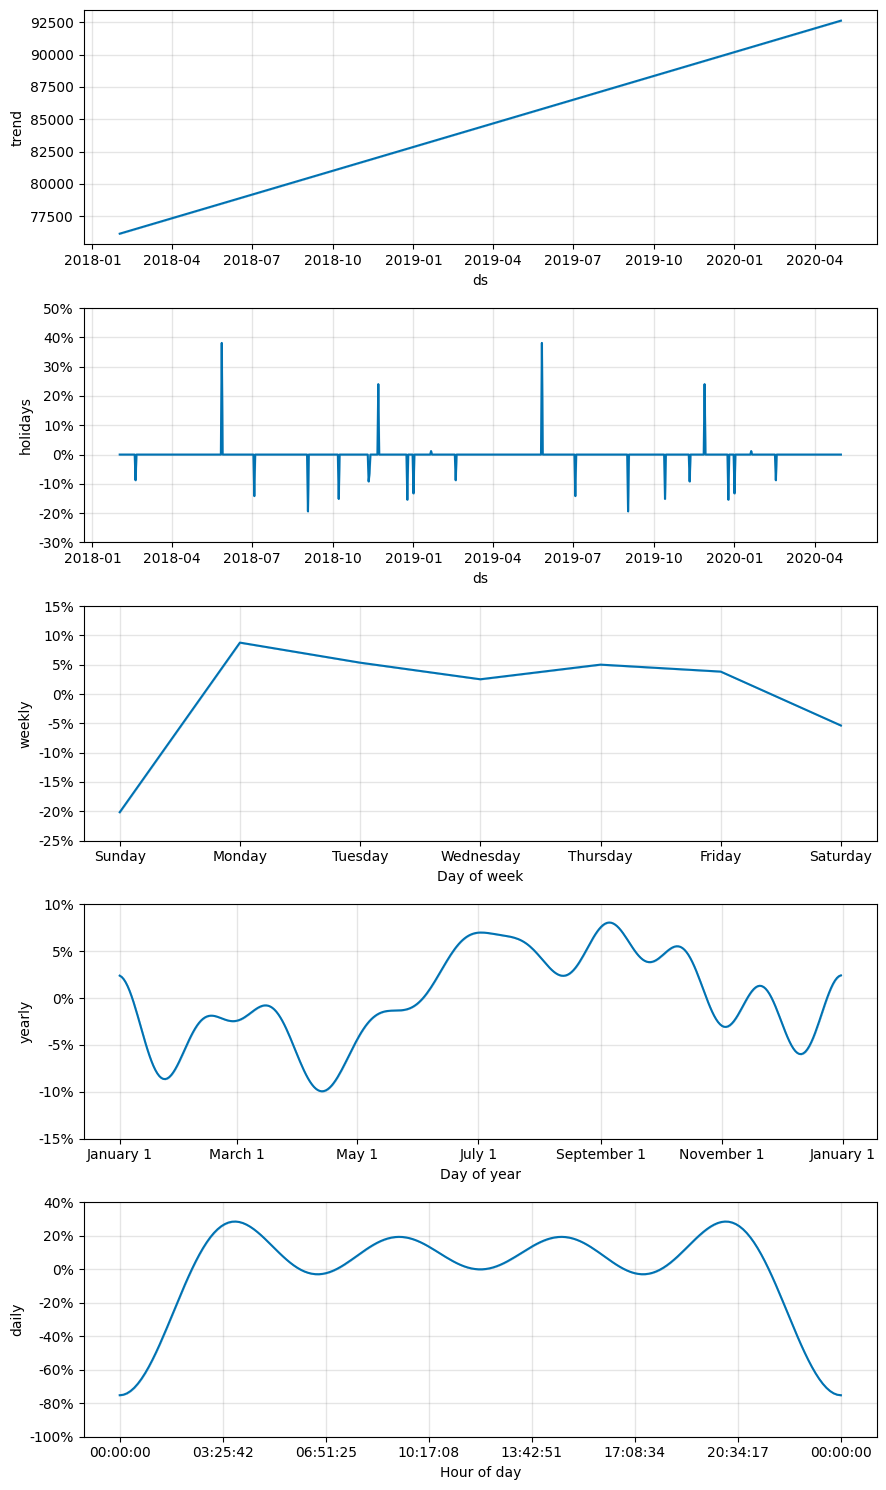

In [82]:
fig =final_model.plot_components(forecast)


In [83]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_components_plotly(final_model,forecast)

/usr/local/lib/python3.12/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [84]:
X_tst_final= final_model.predict(X_tst)
X_tst_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


,ds,yhat,yhat_lower,yhat_upper
50,2020-02-20,25375.223840,-1528.319760,52697.843963
51,2020-02-21,24228.648139,-2805.440801,52117.293533
52,2020-02-22,15764.752328,-10570.443341,42585.388756
53,2020-02-23,2183.786836,-24246.935584,29380.274763
54,2020-02-24,28542.383326,-2257.077448,55905.131094
55,2020-02-25,25362.869175,-2642.568367,54402.431440
56,2020-02-26,22734.158146,-4790.730195,50103.930047


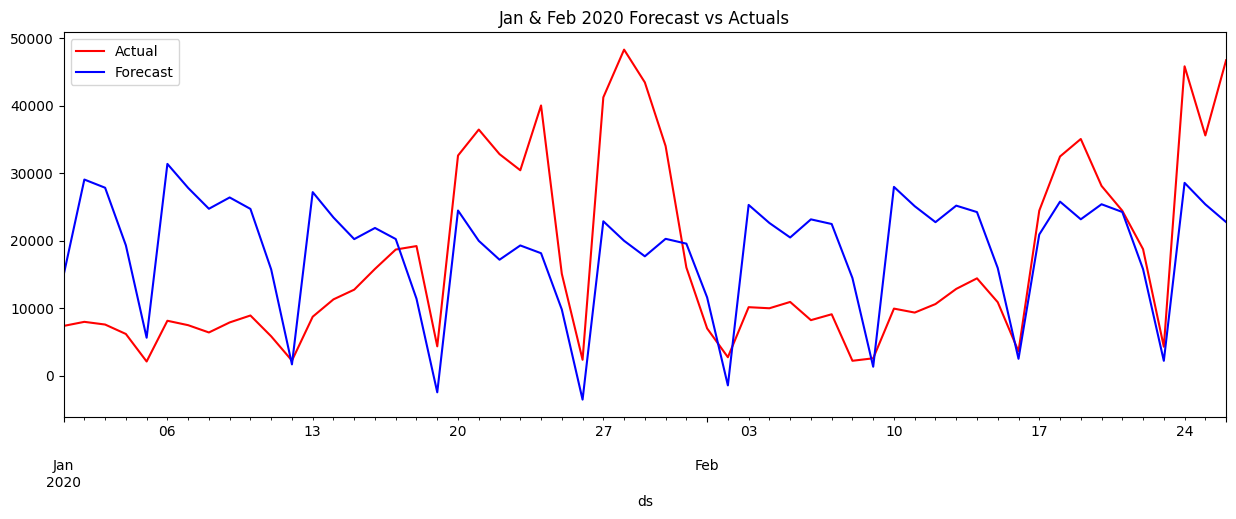

In [85]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_final.plot(kind='line',x='ds',y='yhat', color='blue',label='Forecast', ax=ax)
plt.title('Jan & Feb 2020 Forecast vs Actuals')
plt.show()


In [86]:
MAPE = mean_absolute_percentage_error(X_tst['y'],abs(X_tst_final['yhat']))
print('MAPE', MAPE)

MAPE 1.03165107620436


In [87]:
X_tr

,ds,y
0,2018-02-01,21199.0
1,2018-02-02,10634.0
2,2018-02-03,7966.0
3,2018-02-04,1353.0
4,2018-02-05,9497.0
...,...,...
694,2019-12-27,44154.6
695,2019-12-28,21527.6
696,2019-12-29,3058.5
697,2019-12-30,47041.5


<Axes: >

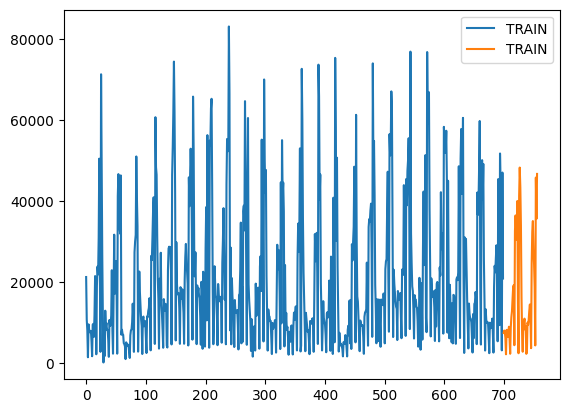

In [88]:
X_tr['y'].plot(x='ds', legend=True, label='TRAIN')
X_tst['y'].plot(x='ds', legend=True, label='TRAIN')


TypeError: 'DataFrame' object is not callable

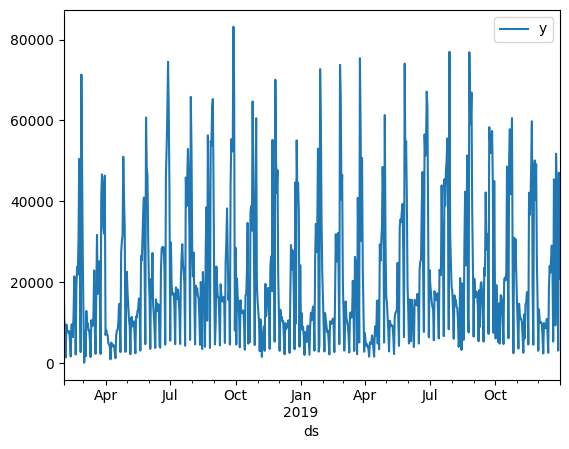

In [89]:
X_tr.set_index('ds').plot(legend=True,label='TRAIN')
X_tst('ds').plot(legend=True,label='TEST')
plt.show()


In [90]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2018-02-01,76160.955000,-9672.271975,46320.325644,76160.955000,76160.955000,0.0,0.0,0.0,0.0,...,0.050257,0.050257,0.050257,-0.064571,-0.064571,-0.064571,0.0,0.0,0.0,17794.962104
1,2018-02-02,76180.991058,-10296.378601,43493.731669,76180.991058,76180.991058,0.0,0.0,0.0,0.0,...,0.038364,0.038364,0.038364,-0.059946,-0.059946,-0.059946,0.0,0.0,0.0,17245.972332
2,2018-02-03,76201.027116,-15891.407462,38271.587346,76201.027116,76201.027116,0.0,0.0,0.0,0.0,...,-0.053657,-0.053657,-0.053657,-0.055235,-0.055235,-0.055235,0.0,0.0,0.0,10597.466617
3,2018-02-04,76221.063174,-27118.830817,28575.441622,76221.063174,76221.063174,0.0,0.0,0.0,0.0,...,-0.201702,-0.201702,-0.201702,-0.050538,-0.050538,-0.050538,0.0,0.0,0.0,-325.890674
4,2018-02-05,76241.099232,-7281.046354,50497.449028,76241.099232,76241.099232,0.0,0.0,0.0,0.0,...,0.087845,0.087845,0.087845,-0.045948,-0.045948,-0.045948,0.0,0.0,0.0,22099.334660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,2020-04-27,92539.003164,-6192.753471,52199.542551,92538.700398,92539.281573,0.0,0.0,0.0,0.0,...,0.087845,0.087845,0.087845,-0.059005,-0.059005,-0.059005,0.0,0.0,0.0,25615.198006
817,2020-04-28,92559.077221,-3557.400831,51028.325135,92558.772335,92559.358964,0.0,0.0,0.0,0.0,...,0.053614,0.053614,0.053614,-0.054775,-0.054775,-0.054775,0.0,0.0,0.0,22843.821639
818,2020-04-29,92579.151278,-7701.741697,47250.524910,92578.842817,92579.436287,0.0,0.0,0.0,0.0,...,0.025279,0.025279,0.025279,-0.050625,-0.050625,-0.050625,0.0,0.0,0.0,20609.757573
819,2020-04-30,92599.225335,-3746.720639,48027.254729,92598.913745,92599.513265,0.0,0.0,0.0,0.0,...,0.050257,0.050257,0.050257,-0.046594,-0.046594,-0.046594,0.0,0.0,0.0,23300.399235


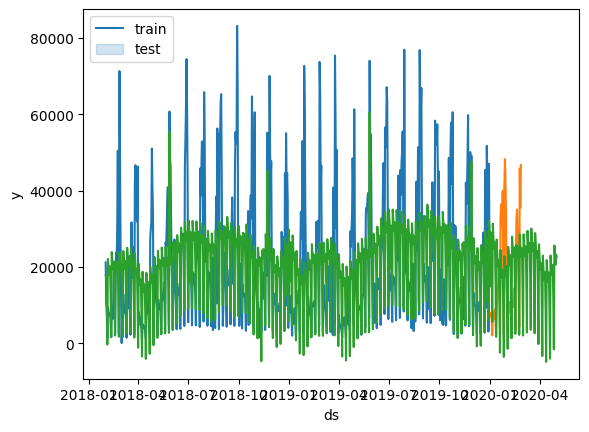

In [91]:
sns.lineplot(x=X_tr['ds'], y=X_tr['y'])
sns.lineplot(x=X_tst['ds'], y=X_tst['y'])
sns.lineplot(x=forecast['ds'], y=forecast['yhat'])

plt.legend(['train','test'],
            loc='upper left')
sns.set_theme(rc={'figure.figsize': (8.27, 11.7)})
